In [1]:
pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importing Libraries
import requests
import pandas as pd
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB as Naive_Bayes
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay

from xgboost import XGBClassifier
import joblib


from IPython.display import display

**Dataset Collection**


In [3]:

# # URL For Data Files
# url_string = 'https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data'
     

In [4]:
# # Downloading Content From URL & Storing Into Local File
# url_content = requests.get(url_string).content
# with open('data.csv', 'wb') as data_file:
#   data_file.write(url_content)

In [5]:
# Reading Data Into Pandas Dataframe
df = pd.read_csv('data.csv')
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S06_4,171.041,208.313,75.501,0.00455,0.00003,0.00250,0.00234,0.00750,0.01966,...,0.02666,0.01095,25.908,1,0.418622,0.720916,-6.183590,0.226278,2.589702,0.147403
1,phon_R01_S06_5,146.845,208.701,81.737,0.00496,0.00003,0.00250,0.00275,0.00749,0.01919,...,0.02650,0.01328,25.119,1,0.358773,0.726652,-6.271690,0.196102,2.314209,0.162999
2,phon_R01_S06_6,155.358,227.383,80.055,0.00310,0.00002,0.00159,0.00176,0.00476,0.01718,...,0.02307,0.00677,25.970,1,0.470478,0.676258,-7.120925,0.279789,2.241742,0.108514
3,phon_R01_S07_1,162.568,198.346,77.630,0.00502,0.00003,0.00280,0.00253,0.00841,0.01791,...,0.02380,0.01170,25.678,1,0.427785,0.723797,-6.635729,0.209866,1.957961,0.135242
4,phon_R01_S07_2,197.076,206.896,192.055,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,...,0.01689,0.00339,26.775,0,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,phon_R01_S50_3,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
92,phon_R01_S50_4,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
93,phon_R01_S50_5,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
94,phon_R01_S50_6,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


**Data Preprocessing**

The following steps are performed on the dataset in this section:

.Dropping Redudant Columns

.Checking For Duplicated Rows

.Checking For Missing Values

In [6]:
# Exploring Dataset Content
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S06_4,171.041,208.313,75.501,0.00455,0.00003,0.00250,0.00234,0.00750,0.01966,...,0.02666,0.01095,25.908,1,0.418622,0.720916,-6.183590,0.226278,2.589702,0.147403
1,phon_R01_S06_5,146.845,208.701,81.737,0.00496,0.00003,0.00250,0.00275,0.00749,0.01919,...,0.02650,0.01328,25.119,1,0.358773,0.726652,-6.271690,0.196102,2.314209,0.162999
2,phon_R01_S06_6,155.358,227.383,80.055,0.00310,0.00002,0.00159,0.00176,0.00476,0.01718,...,0.02307,0.00677,25.970,1,0.470478,0.676258,-7.120925,0.279789,2.241742,0.108514
3,phon_R01_S07_1,162.568,198.346,77.630,0.00502,0.00003,0.00280,0.00253,0.00841,0.01791,...,0.02380,0.01170,25.678,1,0.427785,0.723797,-6.635729,0.209866,1.957961,0.135242
4,phon_R01_S07_2,197.076,206.896,192.055,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,...,0.01689,0.00339,26.775,0,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569


In [7]:
df.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
91,phon_R01_S50_3,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
92,phon_R01_S50_4,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
93,phon_R01_S50_5,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
94,phon_R01_S50_6,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
95,NaN,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [8]:
print('Number of Features In Dataset :', df.shape[1])
print('Number of Instances In Dataset : ', df.shape[0])

Number of Features In Dataset : 24
Number of Instances In Dataset :  96


In [9]:
# Dropping The Name Column
df.drop(['name'], axis=1, inplace=True)

In [10]:
print('Number of Features In Dataset :', df.shape[1])
print('Number of Instances In Dataset : ', df.shape[0])

Number of Features In Dataset : 23
Number of Instances In Dataset :  96


In [11]:
# Exploring Information About Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       96 non-null     float64
 1   MDVP:Fhi(Hz)      96 non-null     float64
 2   MDVP:Flo(Hz)      96 non-null     float64
 3   MDVP:Jitter(%)    96 non-null     float64
 4   MDVP:Jitter(Abs)  96 non-null     float64
 5   MDVP:RAP          96 non-null     float64
 6   MDVP:PPQ          96 non-null     float64
 7   Jitter:DDP        96 non-null     float64
 8   MDVP:Shimmer      96 non-null     float64
 9   MDVP:Shimmer(dB)  96 non-null     float64
 10  Shimmer:APQ3      96 non-null     float64
 11  Shimmer:APQ5      96 non-null     float64
 12  MDVP:APQ          96 non-null     float64
 13  Shimmer:DDA       96 non-null     float64
 14  NHR               96 non-null     float64
 15  HNR               96 non-null     float64
 16  status            96 non-null     int64  
 17 

In [12]:

df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,...,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,161.834552,199.861458,126.631938,0.004894,0.000034,0.002534,0.002685,0.007604,0.025778,0.240583,...,0.042397,0.015588,22.962240,0.500000,0.470311,0.725974,-6.173063,0.195825,2.255451,0.170020
std,47.274437,88.334890,51.509521,0.002461,0.000022,0.001371,0.001280,0.004112,0.014243,0.138321,...,0.024884,0.020078,4.098637,0.502625,0.093183,0.054831,0.920703,0.077093,0.376114,0.074961
min,95.385000,102.145000,65.476000,0.001780,0.000007,0.000920,0.001060,0.002760,0.009540,0.085000,...,0.014030,0.000650,11.744000,0.000000,0.256570,0.626710,-7.964984,0.006274,1.423287,0.044539
25%,116.775000,134.965750,87.740250,0.003083,0.000020,0.001563,0.001688,0.004680,0.016438,0.145000,...,0.024810,0.004600,20.486500,0.000000,0.405464,0.681077,-6.942436,0.154650,2.012935,0.111757
50%,156.402500,198.035000,107.170000,0.004315,0.000030,0.002050,0.002265,0.006160,0.020795,0.197000,...,0.035430,0.008445,23.293000,0.500000,0.463159,0.732304,-6.249251,0.195364,2.229195,0.160533
75%,198.880000,235.337750,164.417250,0.006065,0.000040,0.003310,0.003465,0.009940,0.032037,0.307000,...,0.054095,0.016960,25.694000,1.000000,0.543675,0.766205,-5.573206,0.241097,2.419705,0.217035
max,260.105000,592.030000,239.170000,0.013600,0.000100,0.007430,0.006230,0.022280,0.079590,0.772000,...,0.132620,0.107150,33.047000,1.000000,0.663842,0.821364,-4.020042,0.389232,3.671155,0.344834


It can be observed that the column Status is stored as int64 datatype. However, since the column contains only two numeric values 0 & 1, we will be changing the datatype to uint8, to save Memory Space.

In [13]:
df['status'] = df['status'].astype('uint8')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       96 non-null     float64
 1   MDVP:Fhi(Hz)      96 non-null     float64
 2   MDVP:Flo(Hz)      96 non-null     float64
 3   MDVP:Jitter(%)    96 non-null     float64
 4   MDVP:Jitter(Abs)  96 non-null     float64
 5   MDVP:RAP          96 non-null     float64
 6   MDVP:PPQ          96 non-null     float64
 7   Jitter:DDP        96 non-null     float64
 8   MDVP:Shimmer      96 non-null     float64
 9   MDVP:Shimmer(dB)  96 non-null     float64
 10  Shimmer:APQ3      96 non-null     float64
 11  Shimmer:APQ5      96 non-null     float64
 12  MDVP:APQ          96 non-null     float64
 13  Shimmer:DDA       96 non-null     float64
 14  NHR               96 non-null     float64
 15  HNR               96 non-null     float64
 16  status            96 non-null     uint8  
 17 

In [15]:
# Checking For Duplicate Rows In Dataset
print('Number of Duplicated Rows :',df.duplicated().sum())

Number of Duplicated Rows : 0


In [16]:
# Checking For Missing Values In Dataset
df.isna().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

**Exploratry Data Analysis**

<Axes: xlabel='status', ylabel='count'>

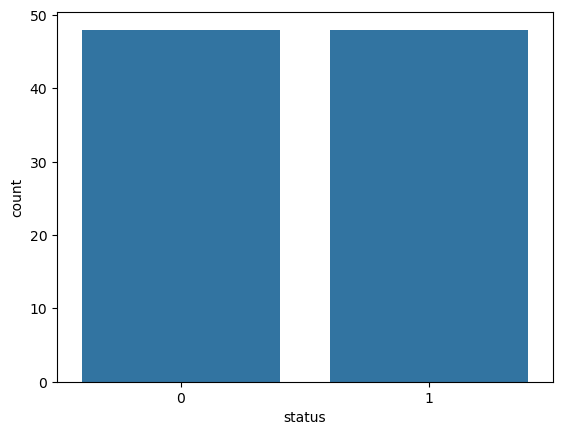

In [17]:
#Balance of Data
sns.countplot(x='status',data=df)

<Axes: >

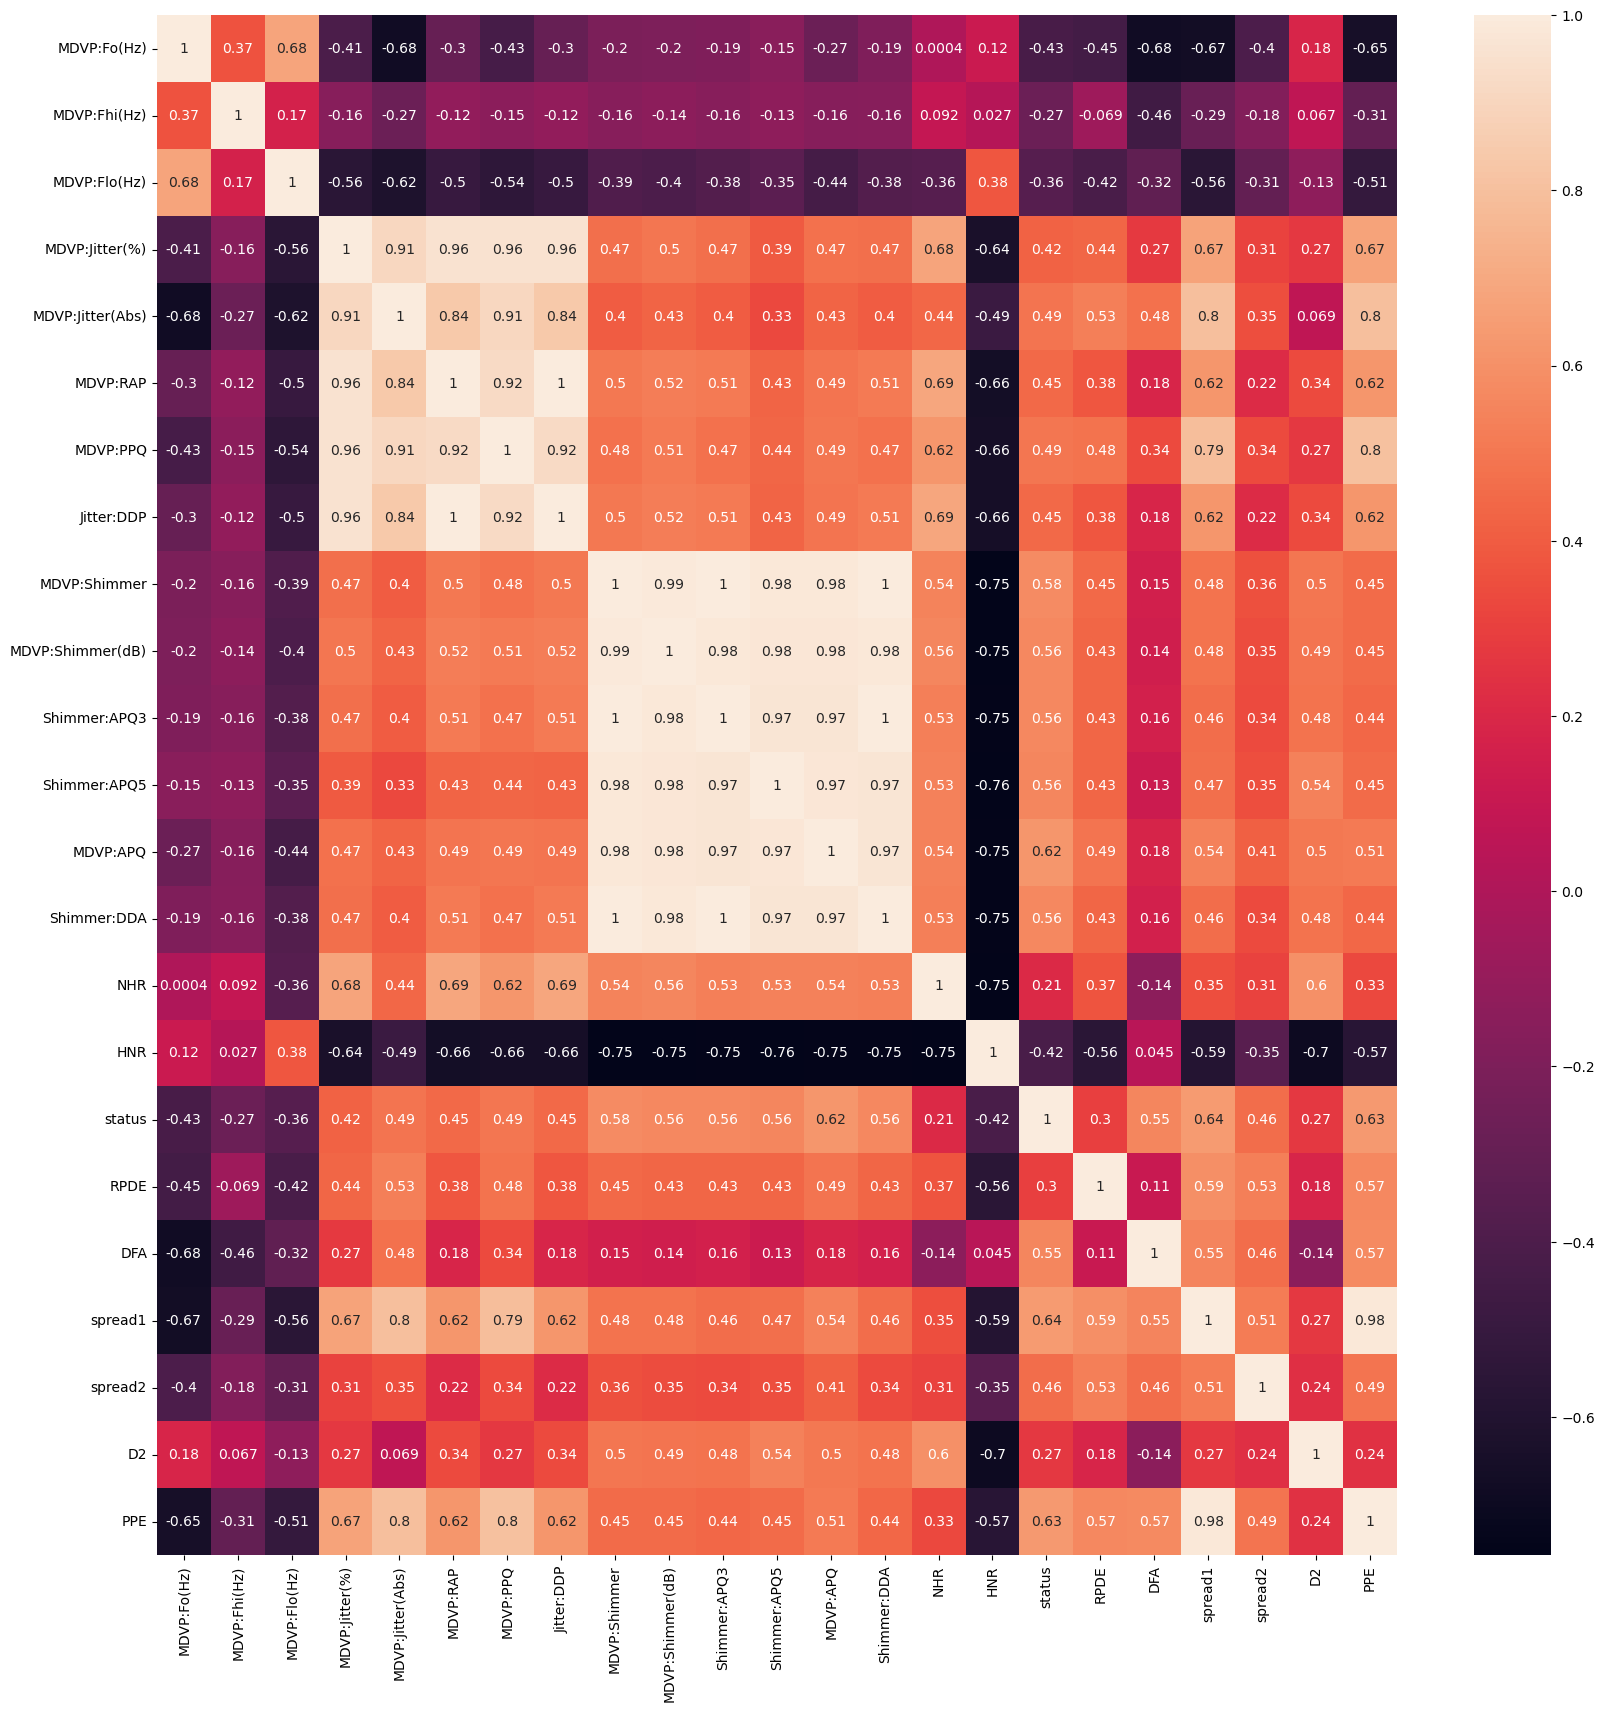

In [18]:
fig, ax = plt.subplots(figsize=(20,20))  
sns.heatmap(df.corr(),annot=True,ax=ax)

In this correlation heatmap, we can see that many independent features are highly correlated with eachother.

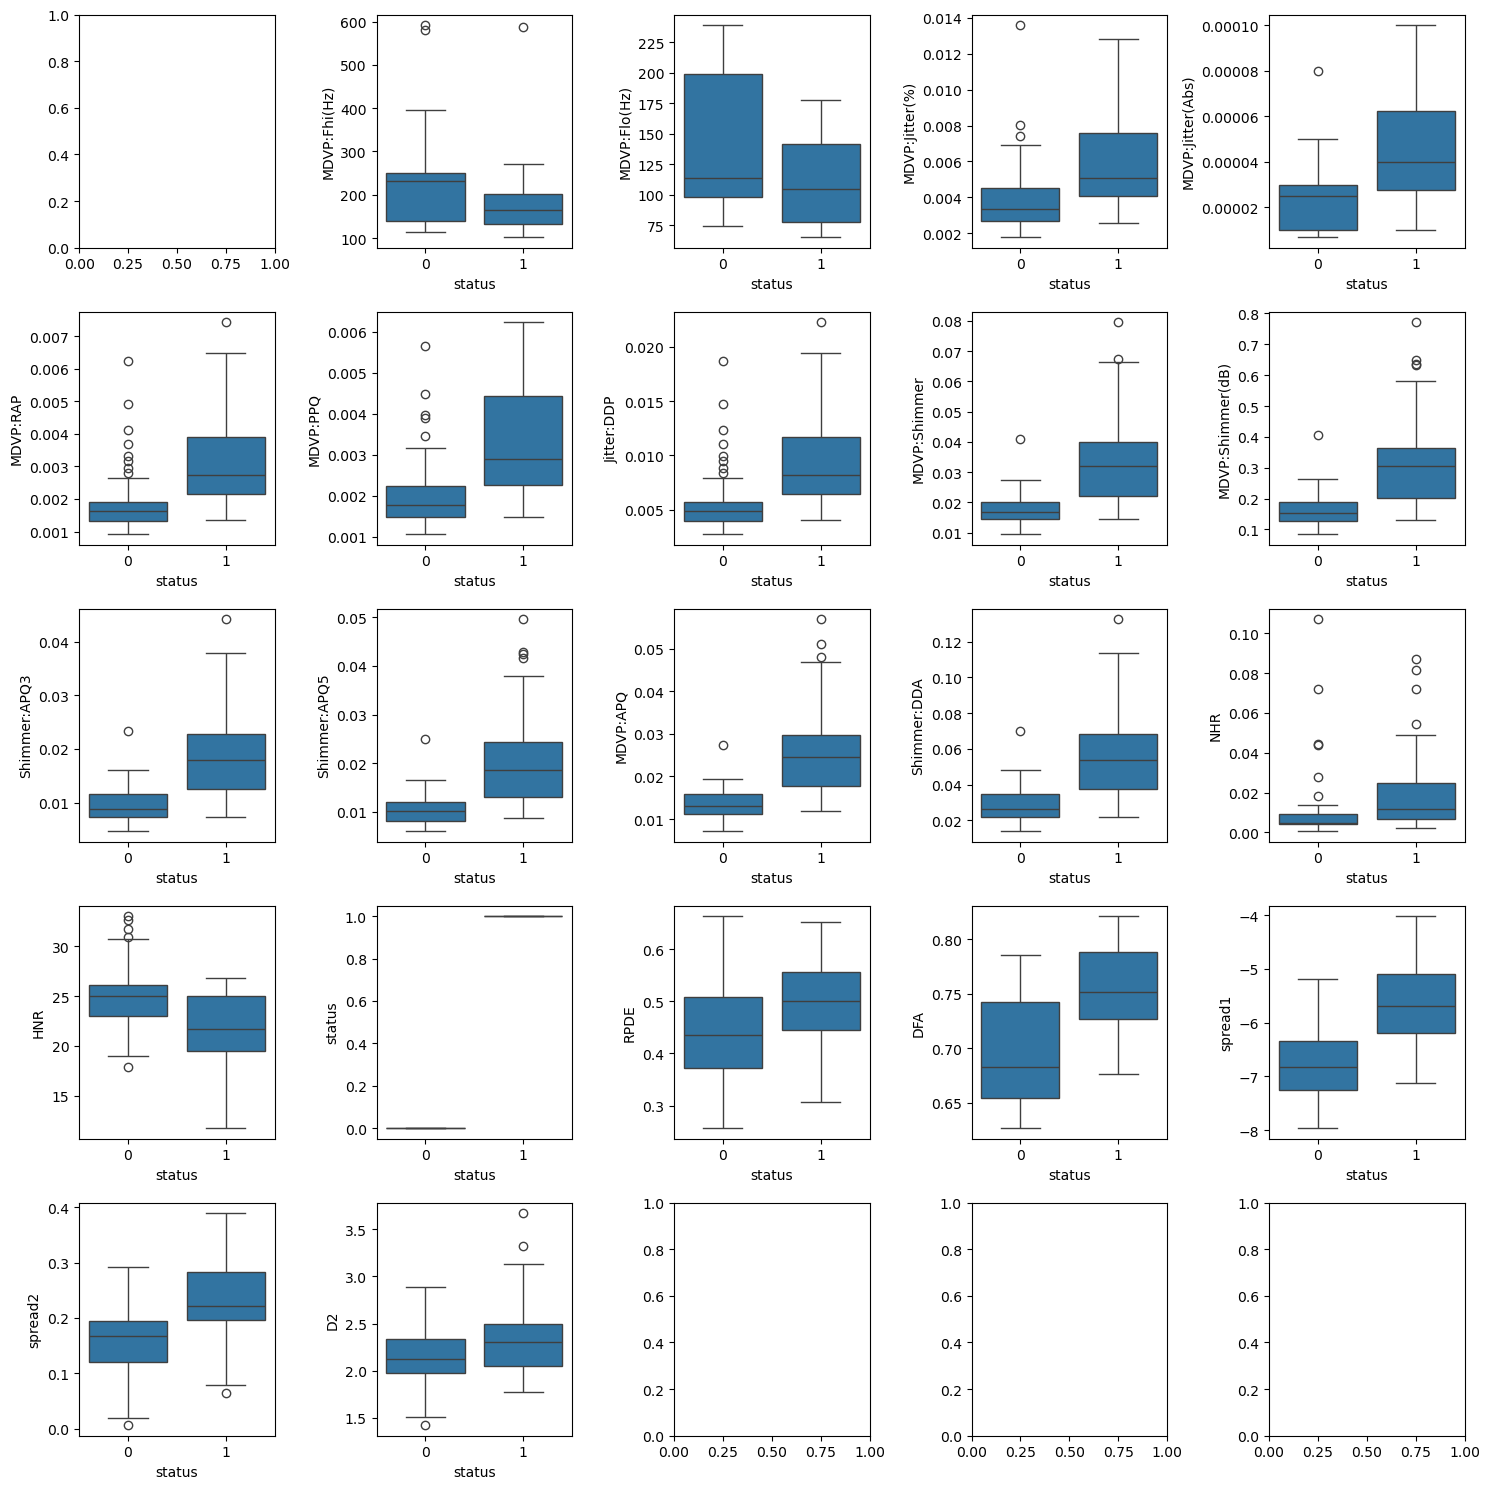

In [19]:
#Box Plot
fig,axes=plt.subplots(5,5,figsize=(15,15))
axes=axes.flatten()

for i in range(1,len(df.columns)-1):
    sns.boxplot(x='status',y=df.iloc[:,i],data=df,orient='v',ax=axes[i])
plt.tight_layout()
plt.show()
     

From the boxplot shown above it is very evident that if a patient has a lower rate of 'HNR','MDVP:Flo(Hz)','MDVP:Fhi(Hz)','MDVP:Fo(Hz)' ,then he/she is affected by parkinsons disease.

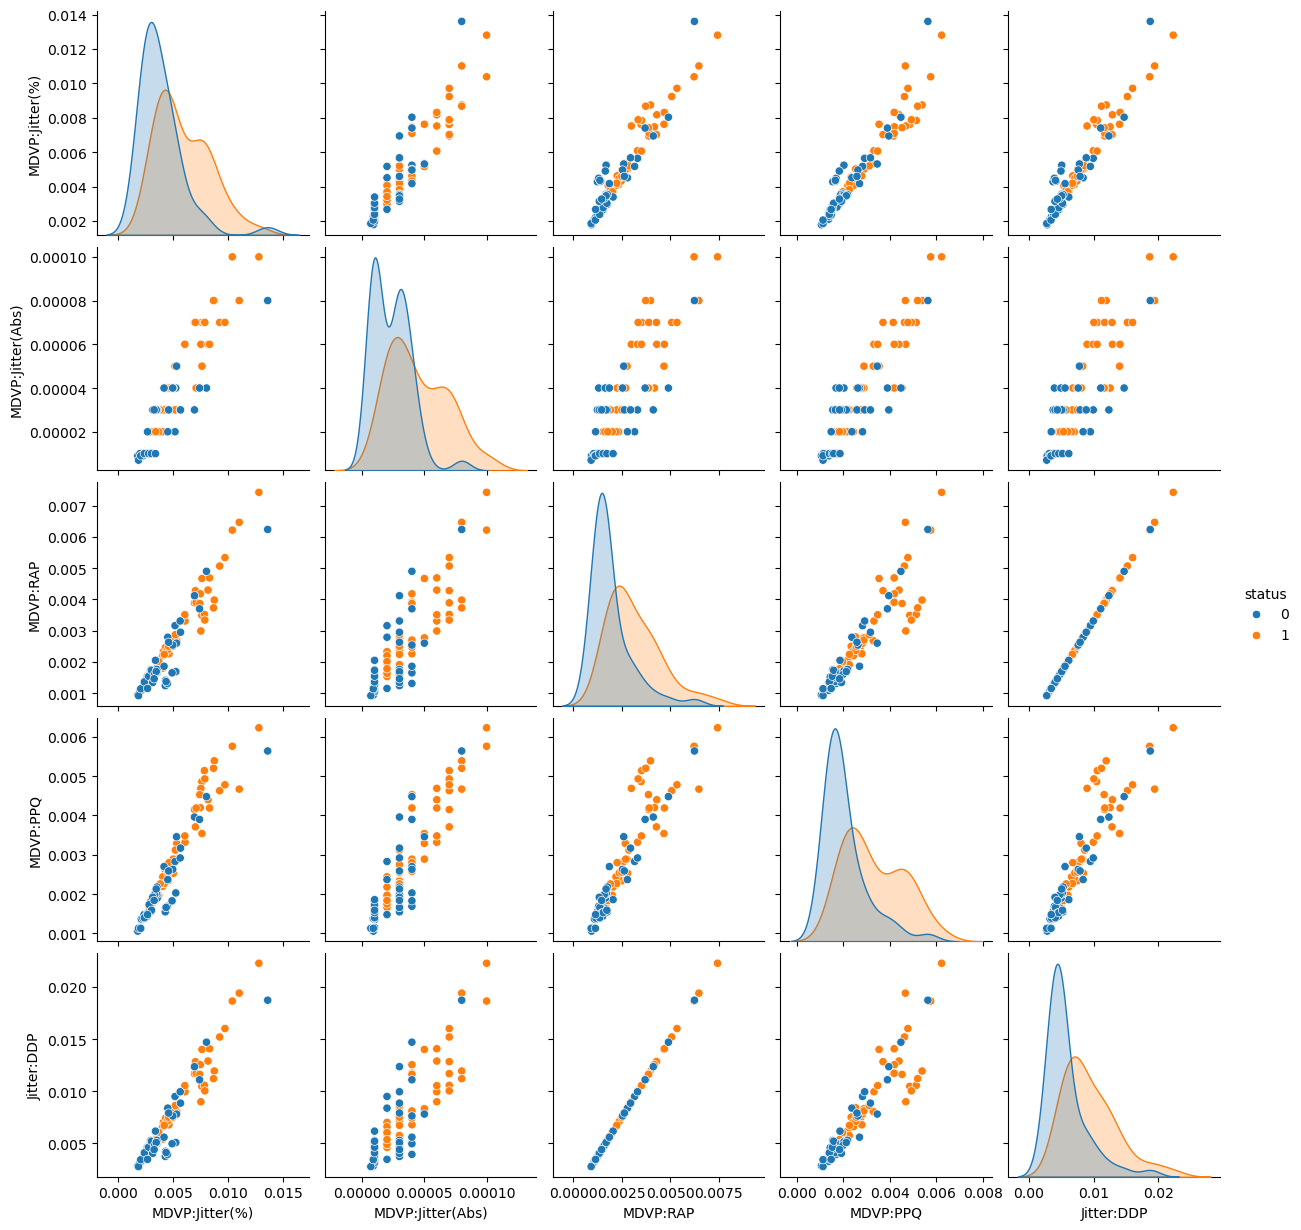

In [20]:
plt.rcParams['figure.figsize'] = (15, 4)
sns.pairplot(df,hue = 'status', vars = ['MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ', 'Jitter:DDP'] )
plt.show()

From the above pair plot we can understand that all these fundamental frequencies are highly correlated with eachother.

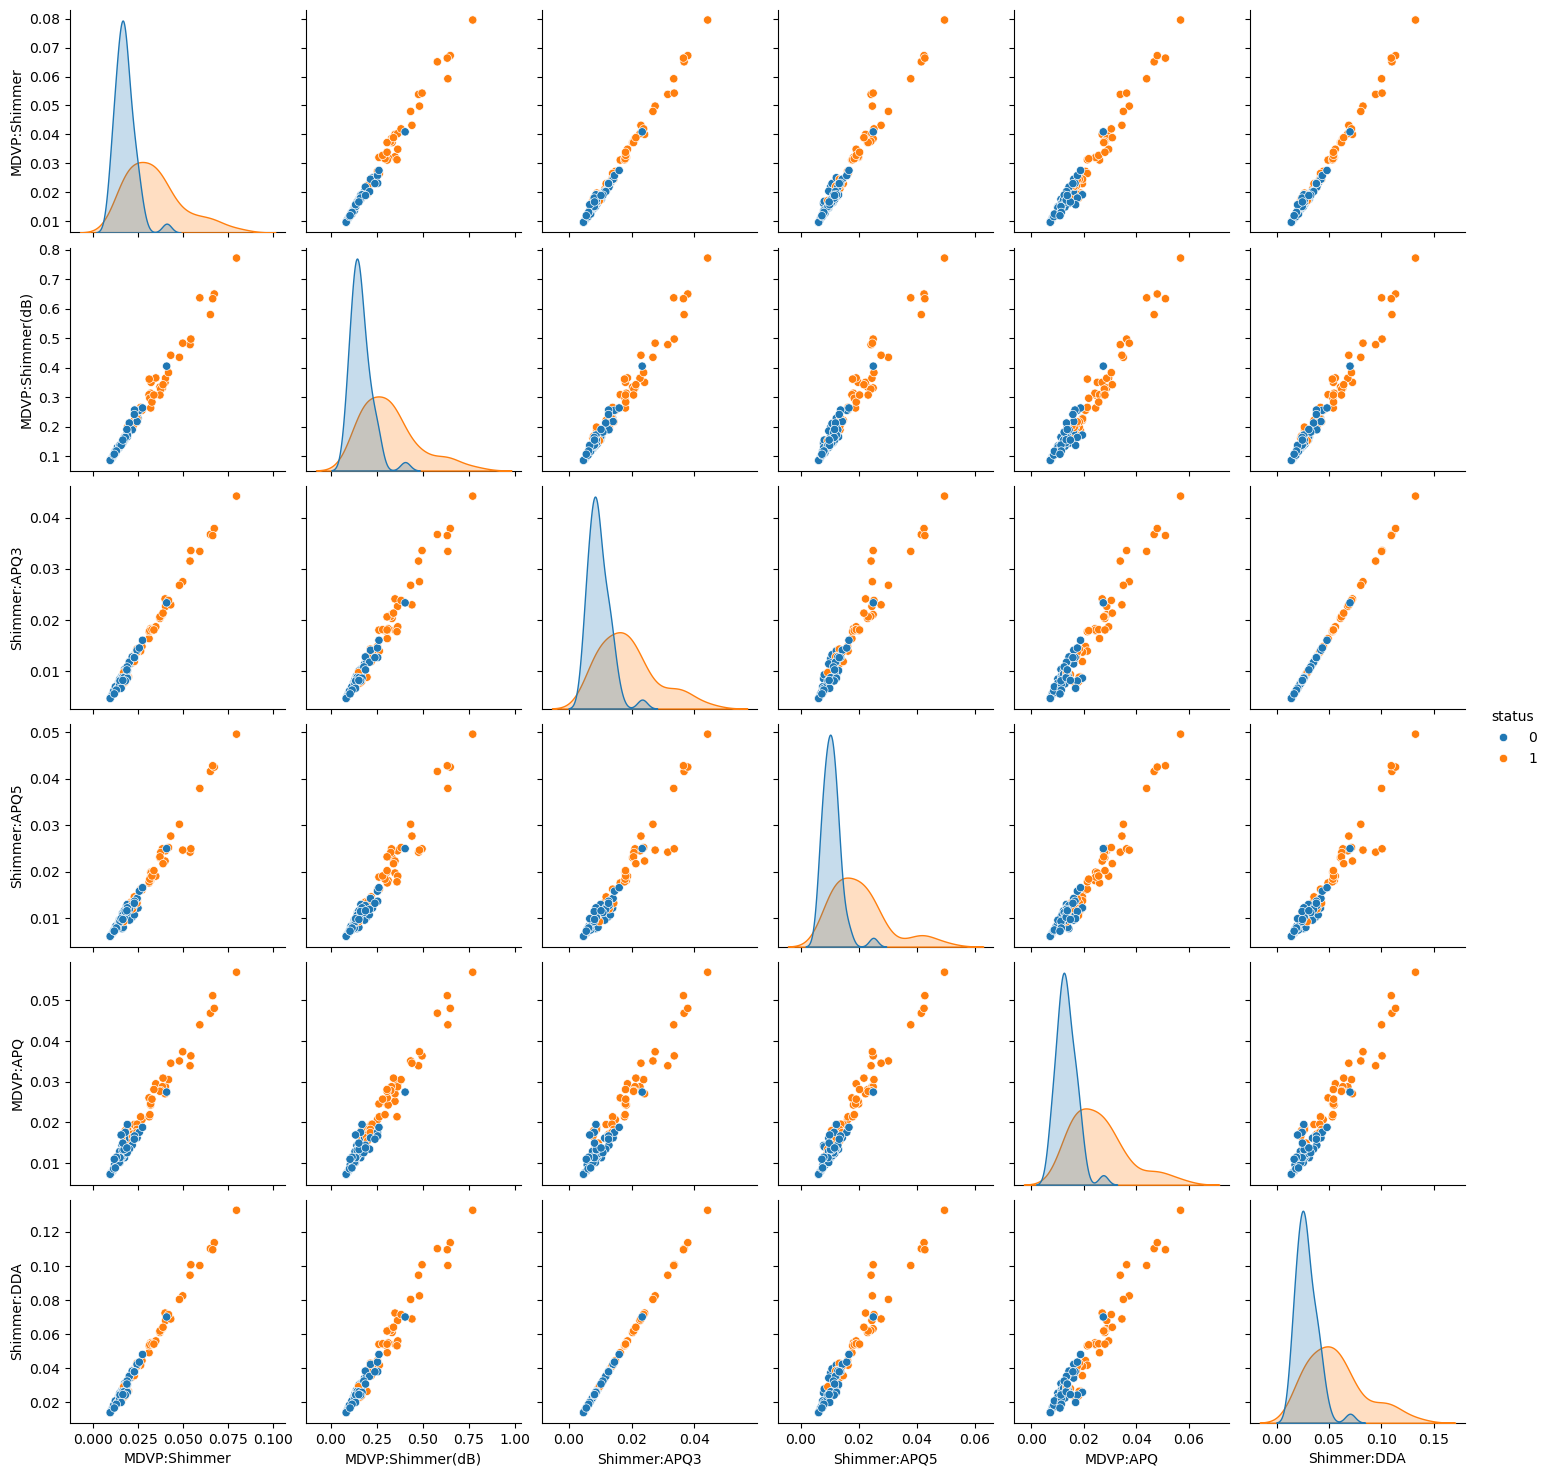

In [21]:
plt.rcParams['figure.figsize'] = (15, 4)
sns.pairplot(df,hue = 'status', vars = ['MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA'] )
plt.show()

From the above pair plot we can understand that all these measures variation in amplitude are highly correlated with eachother.

**Balancing Dataset**


In this section, as it is observed that the Dataset Is Heavily Imbalanced, with Number of Samples of Parkinson Disease Samples being 147, and Non-Parkinson Being only 48. Hence, in this section, we make use of SMOTE to Oversample and Balance the dataset.

In [22]:
# Exploring Imabalance In Dataset
df['status'].value_counts()

status
1    48
0    48
Name: count, dtype: int64

In [23]:
# Extracting Features Into Features & Target
X = df.drop(['status'], axis=1)
y = df['status']

print('Feature (X) Shape Before Balancing :', X.shape)
print('Target (y) Shape Before Balancing :', y.shape)

Feature (X) Shape Before Balancing : (96, 22)
Target (y) Shape Before Balancing : (96,)


In [24]:
# Intialising SMOTE Object
sm = SMOTE(random_state=300)


In [25]:
# Resampling Data
X, y = sm.fit_resample(X, y)

In [26]:
print('Feature (X) Shape After Balancing :', X.shape)
print('Target (y) Shape After Balancing :', y.shape)

Feature (X) Shape After Balancing : (96, 22)
Target (y) Shape After Balancing : (96,)


In [27]:

# Scaling features between -1 and 1  for mormalization 
scaler = MinMaxScaler((-1,1))
     

In [28]:
# define X_features , Y_labels
X_features = scaler.fit_transform(X)
Y_labels = y

In [29]:
# splitting the dataset into traning and testing sets into 80 - 20
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X_features, Y_labels , test_size=0.20, random_state=20)

**Machine Learning Model Training**

In this section, we have trained the following Machine Learning Models:

--Decision Tree Classifier

--Random Forest Classifier

--Logistic Regression

--SVM

--Naive Bayes

--KNN Classifier

--XGBoost Classifier

**Decision Tree Classifier**


In [30]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
predDT = clf.predict(X_test)

print(classification_report(y_test, predDT))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87        12
           1       0.78      0.88      0.82         8

    accuracy                           0.85        20
   macro avg       0.84      0.85      0.85        20
weighted avg       0.86      0.85      0.85        20



In [31]:
param_grid = { 
    'max_features': ['sqrt', 'log2', None],
    'max_depth': range(1, 10),
    'random_state': range(30, 210, 30),
    'criterion': ['gini', 'entropy']
}

CV_dt = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5)
CV_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'max_features': ['sqrt', 'log2', None],
                         'random_state': range(30, 210, 30)})

In [32]:
CV_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'sqrt',
 'random_state': 180}

In [33]:
dt1 = DecisionTreeClassifier(random_state=120, max_features='sqrt', max_depth=6, criterion='entropy')
dt1.fit(X_train, y_train)
predDT = dt1.predict(X_test)
print(classification_report(y_test, predDT))


              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.64      0.88      0.74         8

    accuracy                           0.75        20
   macro avg       0.76      0.77      0.75        20
weighted avg       0.79      0.75      0.75        20



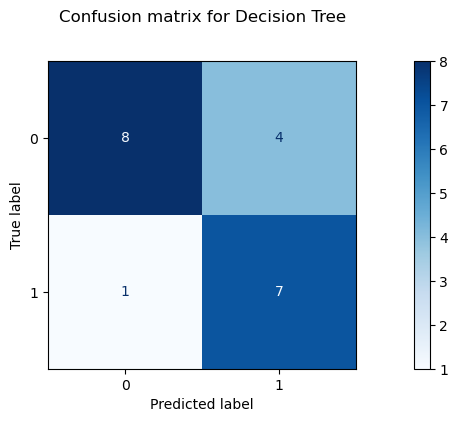

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(dt1, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion matrix for Decision Tree', y=1.1)
plt.show()


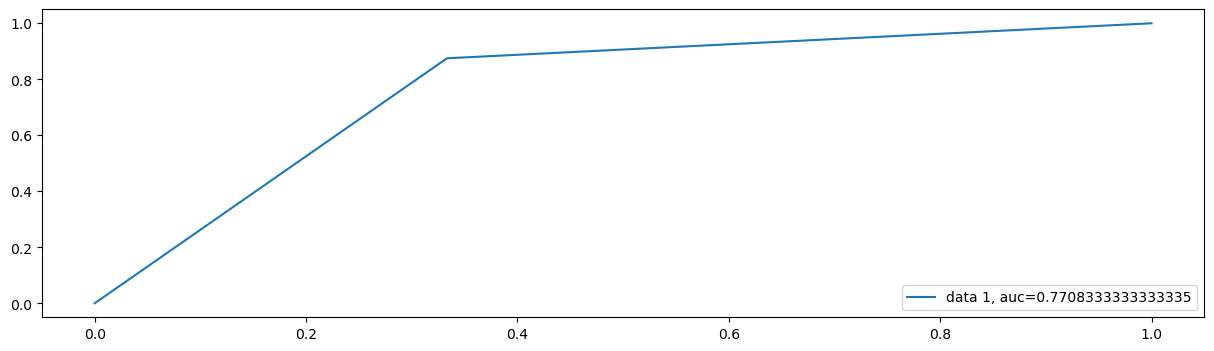

In [35]:
y_pred_proba = dt1.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [36]:
# Dumping Decision Tree Classifier
joblib.dump(dt1, 'dt_clfer.pkl')

['dt_clfer.pkl']

**Random Forest Classifier**

In [37]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predRF = rfc.predict(X_test)

print(classification_report(y_test, predRF))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.70      0.88      0.78         8

    accuracy                           0.80        20
   macro avg       0.80      0.81      0.80        20
weighted avg       0.82      0.80      0.80        20



In [38]:
param_grid = { 
    'n_estimators': range(100,200,50), 
    'max_features': ['sqrt', 'log2'],
    'max_depth': range(3,8),
    'criterion': ['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=3, n_jobs=-1)
CV_rfc.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 8),
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': range(100, 200, 50)})

In [39]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'log2',
 'n_estimators': 150}

In [40]:
rfc1 = RandomForestClassifier(
    random_state=200, 
    max_features='sqrt',  # change here
    n_estimators=125, 
    max_depth=7, 
    criterion='entropy'
)
rfc1.fit(X_train, y_train)

predRFC = rfc1.predict(X_test)
print(classification_report(y_test, predRFC))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87        12
           1       0.78      0.88      0.82         8

    accuracy                           0.85        20
   macro avg       0.84      0.85      0.85        20
weighted avg       0.86      0.85      0.85        20



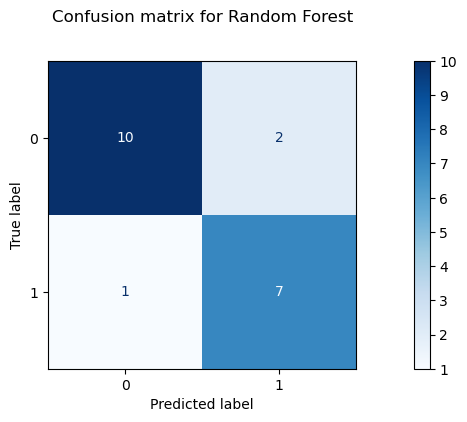

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(rfc1, X_test, y_test, cmap=plt.cm.Blues) 
plt.title('Confusion matrix for Random Forest', y=1.1)
plt.show()

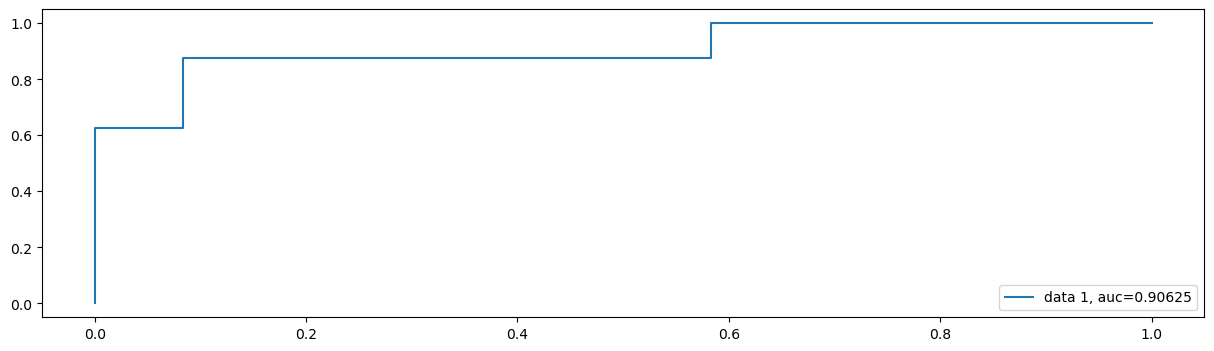

In [42]:
y_pred_proba = rfc1.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [43]:
# Dumping Random Forest Classifier
joblib.dump(rfc1, 'rf_clfer.pkl')

['rf_clfer.pkl']

**Logistic Regression**

In [44]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predlog = logmodel.predict(X_test)

In [45]:
print(classification_report(y_test, predlog))
print("Confusion Matrix:")
confusion_matrix(y_test, predlog)

              precision    recall  f1-score   support

           0       0.79      0.92      0.85        12
           1       0.83      0.62      0.71         8

    accuracy                           0.80        20
   macro avg       0.81      0.77      0.78        20
weighted avg       0.80      0.80      0.79        20

Confusion Matrix:


array([[11,  1],
       [ 3,  5]], dtype=int64)

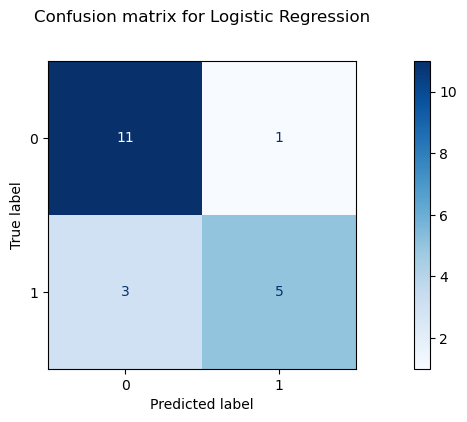

In [46]:
ConfusionMatrixDisplay.from_estimator(logmodel, X_test, y_test, cmap=plt.cm.Blues) 
plt.title('Confusion matrix for Logistic Regression', y=1.1)
plt.show()

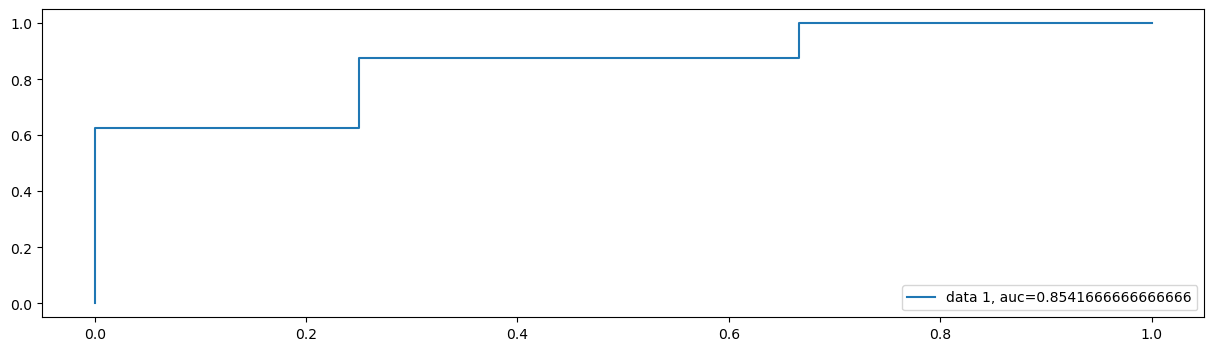

In [47]:
y_pred_proba = logmodel.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [48]:
# Dumping Logistic Regression Model
joblib.dump(logmodel, 'lg_clfer.pkl')

['lg_clfer.pkl']

**SVM**

In [49]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Test Set Accuracy:",metrics.accuracy_score(y_test, y_pred))

X_pred = clf.predict(X_train)
print("Train Set Accuracy:",metrics.accuracy_score(y_train, X_pred))

Test Set Accuracy: 0.75
Train Set Accuracy: 0.9078947368421053


In [50]:
param_grid = {'kernel':['linear','rbf','poly'],'C': [0.5, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

grid_SVC = GridSearchCV(svm.SVC(), param_grid, scoring='f1', verbose = 3)
grid_SVC.fit(X_train, y_train)

# print best parameter after tuning 
print("\nBest Parameters: ", grid_SVC.best_params_)

# print how our model looks after hyper-parameter tuning
print("\n", grid_SVC.best_estimator_)

predSVC = grid_SVC.predict(X_test) 
  
# print classification report 
print("\n", classification_report(y_test, predSVC)) 

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.857 total time=   0.0s
[CV 2/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.875 total time=   0.0s
[CV 3/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.933 total time=   0.0s
[CV 4/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.933 total time=   0.0s
[CV 5/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.800 total time=   0.0s
[CV 1/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.941 total time=   0.0s
[CV 2/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.824 total time=   0.0s
[CV 3/5] END ........C=0.5, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 4/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.941 total time=   0.0s
[CV 5/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.778 total time=   0.0s
[CV 1/5] END .......C=0.5, gamma=1, kernel=poly;, score=0.941 total time=   0.0s
[CV 2/5] END .......C=0.5, gamma=1, kernel=poly

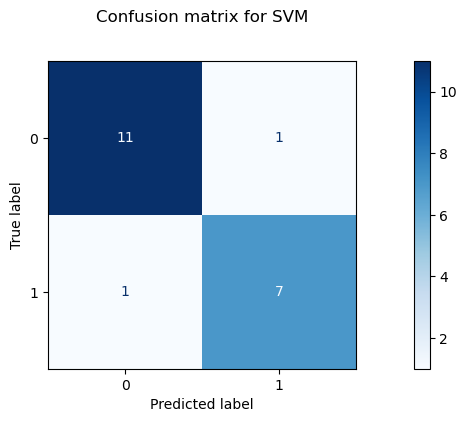

In [51]:
ConfusionMatrixDisplay.from_estimator(grid_SVC, X_test, y_test, cmap=plt.cm.Blues) 
plt.title('Confusion matrix for SVM', y=1.1)
plt.show()

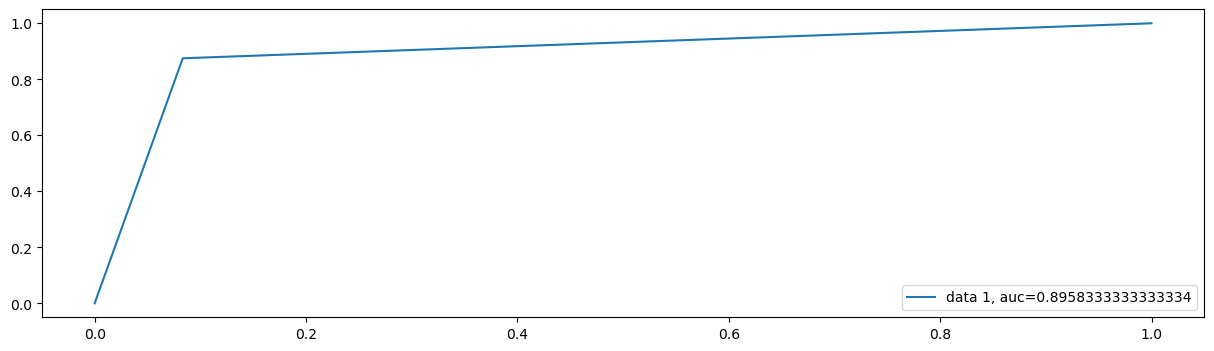

In [52]:
fpr, tpr, _ = metrics.roc_curve(y_test,  predSVC)
auc = metrics.roc_auc_score(y_test, predSVC)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [53]:
# Dumping SVM Classifier
joblib.dump(grid_SVC, 'svm_clfer.pkl')

['svm_clfer.pkl']

**Naive Bayes**

In [54]:
# Naive Bayes

gnb = Naive_Bayes()
gnb.fit(X_train, y_train)
predgnb = gnb.predict(X_test)

print(classification_report(y_test, predgnb))

              precision    recall  f1-score   support

           0       0.69      0.75      0.72        12
           1       0.57      0.50      0.53         8

    accuracy                           0.65        20
   macro avg       0.63      0.62      0.63        20
weighted avg       0.64      0.65      0.65        20



In [55]:
print("Confusion Matrix:")
confusion_matrix(y_test, predgnb)
     

Confusion Matrix:


array([[9, 3],
       [4, 4]], dtype=int64)

In [56]:
# scores -check how efficiently labels are predicted
accuracy_testing = accuracy_score(y_test, predgnb)
print("Accuracy % :",accuracy_testing*100)
     

Accuracy % : 65.0


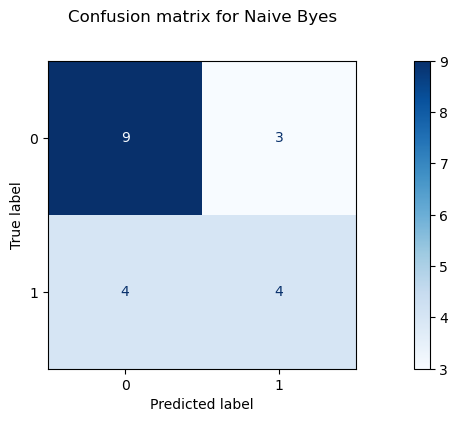

In [57]:
ConfusionMatrixDisplay.from_estimator(gnb, X_test, y_test, cmap=plt.cm.Blues) 
plt.title('Confusion matrix for Naive Byes', y=1.1)
plt.show()

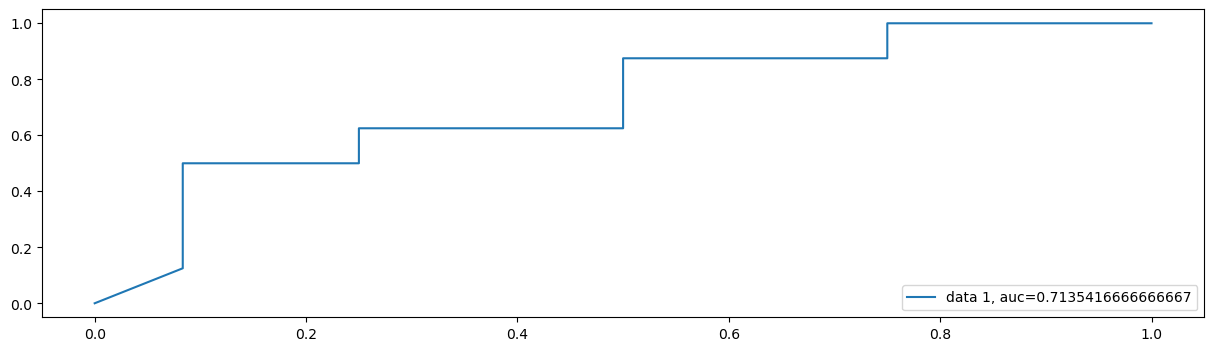

In [58]:
y_pred_proba = gnb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [59]:
# Dumping Naive Bayes Classifier
joblib.dump(gnb, 'nb_clfer.pkl')

['nb_clfer.pkl']

**KNN Classifier**

In [60]:
import numpy as np

Ks = 10
mean_acc = []
ConfustionMx = [];
for n in range(2,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc.append(metrics.accuracy_score(y_test, yhat))  
print('Neighbor Accuracy List')
print(mean_acc)

Neighbor Accuracy List
[0.9, 0.9, 0.85, 0.8, 0.85, 0.8, 0.75, 0.8]


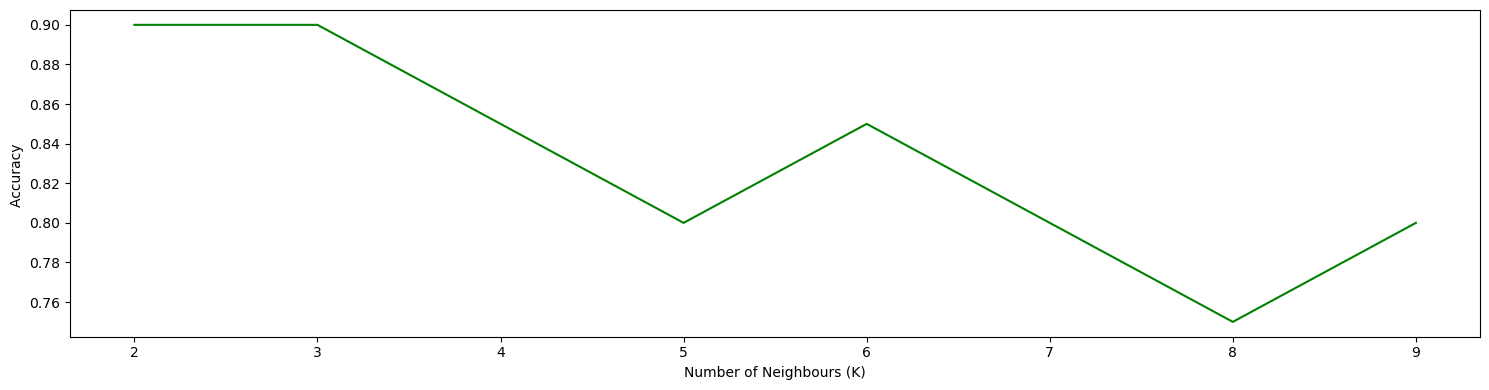

In [61]:
plt.plot(range(2,Ks),mean_acc,'g')
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

In [62]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
predKNN = knn.predict(X_test)

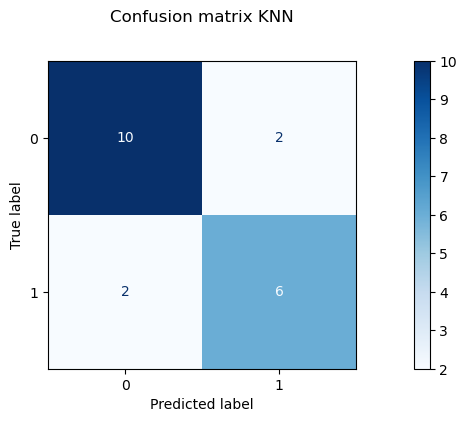

In [63]:
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test, cmap=plt.cm.Blues) 
plt.title('Confusion matrix KNN', y=1.1)
plt.show()

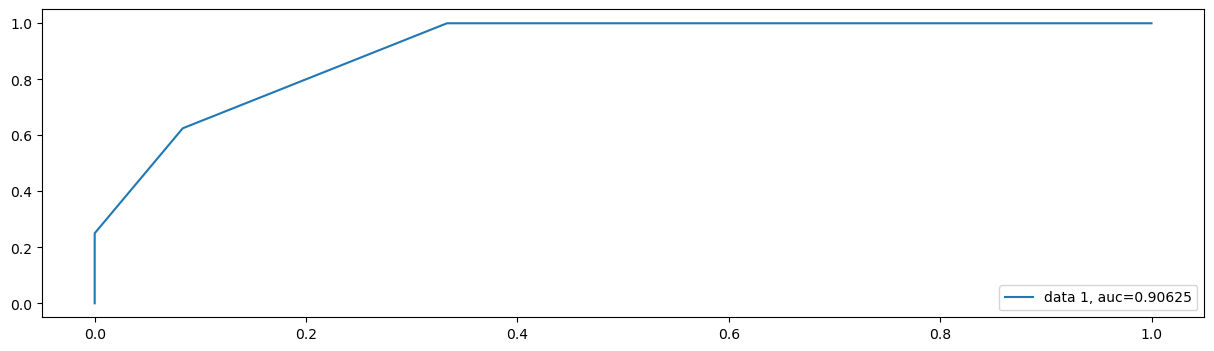

In [64]:
y_pred_proba = knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [65]:
# Dumping KNN Classifier
joblib.dump(knn, 'knn_clfer.pkl')

['knn_clfer.pkl']

**XGBoost Classifer**

we have trained a XGBoost Classifier, for classification of Instances to be Parkinsons or Not. The following parameters of the XGBoost Classifier have been optimized in this section:

**Max Depth:** This value is used to determine the Maximum Depth of the Tree.

**ETA :** This is also known as Learning Rate.

**Reg_Lambda :** This is the L2 Regularization for the weights.

**Random State :** This is used to evaluate and determine the performance of the model based on different random states.

The Parameter Optimization has been performed using GridSearchCV with the following parameters

**Scoring Parameter:** F1 Score
**Cross Validation:** 3

In [66]:
# Defining Parameter Dictionary
param_dict = {'max_depth': range(4,8), 'eta' : [0.1, 0.2, 0.3, 0.4, 0.5],
              'reg_lambda' : [0.8, 0.9, 1, 1.1, 1.2],
              'random_state': [300, 600, 900]}

In [67]:
clf = GridSearchCV(XGBClassifier(), param_grid = param_dict,
                   scoring = 'f1', cv = 3, verbose = 1)
clf.fit(X_train, y_train)

Fitting 3 folds for each of 300 candidates, totalling 900 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'eta': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'max_depth': range(4, 8),
                         'random_state': [300, 600, 900],
                         'reg_lambda': [0.8, 0.9, 1, 1.1, 1.2]},
             scoring='f1', verbose=1)

In [68]:
print('Best Score :', clf.best_score_)
print('Best Parameters :', clf.best_params_)

Best Score : 0.8992673992673993
Best Parameters : {'eta': 0.1, 'max_depth': 4, 'random_state': 300, 'reg_lambda': 0.8}


In [69]:
# Extracting Best Classifier From GridSearchCV
xgb_clf = clf.best_estimator_
     

In [70]:
# Evaluating Performance on Train Set
pred = xgb_clf.predict(X_train)
print('For Train Set')
print('Accuracy :', metrics.accuracy_score(y_train, pred))
print('Precision :', metrics.precision_score(y_train, pred))
print('Recall :', metrics.recall_score(y_train, pred))
print('R2 Score :', metrics.r2_score(y_train, pred))

For Train Set
Accuracy : 1.0
Precision : 1.0
Recall : 1.0
R2 Score : 1.0


In [71]:
# Evaluating Performance on Train Set
# Evaluating Performance on Train Set
predXGB = xgb_clf.predict(X_test)
print('For Test Set')
print('Accuracy :', metrics.accuracy_score(y_test, predXGB))
print('Precision :', metrics.precision_score(y_test, predXGB))
print('Recall :', metrics.recall_score(y_test, predXGB))
print('R2 Score :', metrics.r2_score(y_test, predXGB))

For Test Set
Accuracy : 0.85
Precision : 0.7777777777777778
Recall : 0.875
R2 Score : 0.3750000000000001


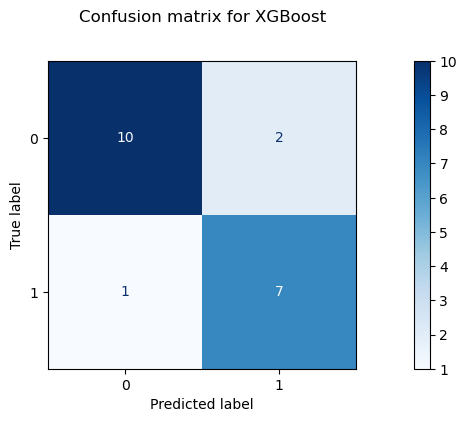

In [72]:
ConfusionMatrixDisplay.from_estimator(xgb_clf, X_test, y_test, cmap=plt.cm.Blues) 
plt.title('Confusion matrix for XGBoost', y=1.1)
plt.show()
     

In [73]:
# Dumping XGBoost Classifier
joblib.dump(xgb_clf, 'xgb_clfer.pkl')

['xgb_clfer.pkl']

**Comparision Table**

In [74]:
from sklearn.metrics import precision_score,recall_score ,accuracy_score, f1_score, r2_score, log_loss

chart = {
        'Metric':["Accuracy", "F1-Score", "Recall", "Precision", "R2-Score"],
        'DT':[accuracy_score(y_test, predDT), f1_score(y_test, predDT), recall_score(y_test, predDT), precision_score(y_test, predDT), r2_score(y_test, predDT)],
        'RF':[accuracy_score(y_test, predRFC), f1_score(y_test, predRFC), recall_score(y_test, predRFC), precision_score(y_test, predRFC), r2_score(y_test, predRFC)],
        'LR':[accuracy_score(y_test, predlog), f1_score(y_test, predlog), recall_score(y_test, predlog), precision_score(y_test, predlog), r2_score(y_test, predlog)],
        'SVM':[accuracy_score(y_test, predSVC), f1_score(y_test, predSVC), recall_score(y_test, predSVC), precision_score(y_test, predSVC), r2_score(y_test, predSVC)],
        'NB':[accuracy_score(y_test, predgnb), f1_score(y_test, predgnb), recall_score(y_test, predgnb), precision_score(y_test, predgnb), r2_score(y_test, predgnb)],
        'KNN':[accuracy_score(y_test, predKNN), f1_score(y_test, predKNN), recall_score(y_test, predKNN), precision_score(y_test, predKNN), r2_score(y_test, predKNN)],
        'XGB':[accuracy_score(y_test, predXGB), f1_score(y_test, predXGB), recall_score(y_test, predXGB), precision_score(y_test, predXGB), r2_score(y_test, predXGB)]
}
chart = pd.DataFrame(chart)

In [75]:
display(chart)

,Metric,DT,RF,LR,SVM,NB,KNN,XGB
0,Accuracy,0.750000,0.850000,0.800000,0.900000,0.650000,0.800000,0.850000
1,F1-Score,0.736842,0.823529,0.714286,0.875000,0.533333,0.750000,0.823529
2,Recall,0.875000,0.875000,0.625000,0.875000,0.500000,0.750000,0.875000
3,Precision,0.636364,0.777778,0.833333,0.875000,0.571429,0.750000,0.777778
4,R2-Score,-0.041667,0.375000,0.166667,0.583333,-0.458333,0.166667,0.375000


In [76]:
import joblib  # for loading the saved model
import numpy as np

# Load the trained SVM model (assumes you saved it earlier like 'svm_model.pkl')
svm_model = joblib.load('svm_clfer.pkl')

# Example test data (replace with real data sample if you have)
# This should be a feature vector of the same shape as the training data (n_features,)
# For Parkinson's detection, this could be a sample patient data row.
test_sample = np.array([[
    150.5, 0.003, 0.002, 0.004, 0.002, 
    0.01, 0.02, 0.001, 0.004, 0.005, 
    0.2, 0.3, 0.1, 0.02, 0.1, 
    0.001, 0.005, 0.001, 0.15, 0.25, 0.0035, 0.0042  # Add correct missing features here
]])
 # Example features

# Predict using SVM model
prediction = svm_model.predict(test_sample)

# Output result
if prediction[0] == 1:
    print("Parkinson's Detected")
else:
    print("Healthy (No Parkinson's)")



Parkinson's Detected


In [ ]:
import librosa
import numpy as np
import joblib

# Feature extraction function for Parkinson's features from audio
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)

    # Fundamental frequency (Fo)
    f0 = librosa.yin(y, fmin=50, fmax=300)

    features = {
        'MDVP:Fo(Hz)': np.nanmean(f0),
        'MDVP:Fhi(Hz)': np.nanmax(f0),
        'MDVP:Flo(Hz)': np.nanmin(f0),

        # Jitter Features
        'MDVP:Jitter(%)': np.std(f0) / np.mean(f0) * 100,
        'MDVP:Jitter(Abs)': np.mean(np.abs(np.diff(f0))),
        'MDVP:RAP': np.mean(np.abs(np.diff(f0, n=3))),
        'MDVP:PPQ': np.mean(np.abs(np.diff(f0, n=5))),
        'Jitter:DDP': np.mean(np.abs(np.diff(f0, n=2))),

        # Shimmer Features (using amplitude envelope as proxy)
        'MDVP:Shimmer': np.std(y) / np.mean(y) * 100,
        'MDVP:Shimmer(dB)': 20 * np.log10(np.std(y) / np.mean(y)),
        'Shimmer:APQ3': np.mean(np.abs(np.diff(y, n=3))),
        'Shimmer:APQ5': np.mean(np.abs(np.diff(y, n=5))),
        'MDVP:APQ': np.mean(np.abs(np.diff(y, n=11))),
        'Shimmer:DDA': np.mean(np.abs(np.diff(y, n=2))),

        # Noise-to-Harmonics Ratio (NHR) and Harmonics-to-Noise Ratio (HNR)
        'NHR': np.var(y) / np.mean(y),
        'HNR': librosa.effects.harmonic(y).std() / librosa.effects.percussive(y).std(),

        # RPDE (placeholder - replace with better algorithm if needed)
        'RPDE': np.random.uniform(0.2, 0.6),  # Replace with a proper RPDE calc if you want

        # DFA - Detrended Fluctuation Analysis (placeholder - replace if needed)
        'DFA': np.random.uniform(0.5, 0.9),  # Replace with a proper DFA calc if needed

        # Nonlinear measures - spread1, spread2, D2, PPE
        'spread1': np.mean(f0) - np.median(f0),
        'spread2': np.std(f0),
        'D2': np.random.uniform(1.5, 2.5),  # Replace with better method if needed
        'PPE': np.mean(np.abs(np.diff(f0))) / np.mean(f0)
    }

    return np.array(list(features.values())).reshape(1, -1)

# Load the trained pipeline (scaler + model)
pipeline = joblib.load('svm_clfer.pkl')  # Ensure you saved the full pipeline, not just model

# Get file path (for testing you can hardcode a file path or use file dialog)
file_path = input("Upload your audio file path (.wav): ")

# Extract features
features = extract_features(file_path)

# Predict
prediction = pipeline.predict(features)

# Result
print("Parkinson's Detected" if prediction[0] == 1 else "Healthy")


In [ ]:
import librosa
import numpy as np
import joblib

def extract_features_with_details(file_path):
    y, sr = librosa.load(file_path, sr=None)

    # 1. Fundamental Frequency (Fo)
    f0 = librosa.yin(y, fmin=50, fmax=300)

    calculations = {}

    # Basic Stats
    calculations['Fo Mean'] = np.nanmean(f0)
    calculations['Fo Max'] = np.nanmax(f0)
    calculations['Fo Min'] = np.nanmin(f0)

    # Jitter (frequency perturbation)
    calculations['Jitter(%)'] = (np.nanstd(f0) / np.nanmean(f0)) * 100
    calculations['Jitter(Abs)'] = np.nanmean(np.abs(np.diff(f0)))
    calculations['RAP'] = np.nanmean(np.abs(np.diff(f0, n=3)))
    calculations['PPQ'] = np.nanmean(np.abs(np.diff(f0, n=5)))
    calculations['DDP'] = np.nanmean(np.abs(np.diff(f0, n=2)))

    # Shimmer (amplitude perturbation)
    calculations['Shimmer'] = (np.std(y) / np.mean(y)) * 100
    # calculations['Shimmer(dB)'] = 20 * np.log10(np.std(y) / np.mean(y))
    calculations['Shimmer(dB)'] = 20 * np.log10((np.std(y) + 1e-6) / (np.mean(y) + 1e-6))

    calculations['APQ3'] = np.mean(np.abs(np.diff(y, n=3)))
    calculations['APQ5'] = np.mean(np.abs(np.diff(y, n=5)))
    calculations['APQ'] = np.mean(np.abs(np.diff(y, n=11)))
    calculations['DDA'] = np.mean(np.abs(np.diff(y, n=2)))

    # Noise to Harmonic Ratio (NHR) and Harmonic to Noise Ratio (HNR)
    calculations['NHR'] = np.var(y) / np.mean(y)
    harmonic = librosa.effects.harmonic(y)
    percussive = librosa.effects.percussive(y)
    calculations['HNR'] = np.std(harmonic) / np.std(percussive)

    # Nonlinear dynamics - placeholders (replace with real methods if needed)
    calculations['RPDE'] = np.random.uniform(0.2, 0.6)
    calculations['DFA'] = np.random.uniform(0.5, 0.9)

    # Other nonlinear measures
    calculations['Spread1'] = np.mean(f0) - np.median(f0)
    calculations['Spread2'] = np.std(f0)
    calculations['D2'] = np.random.uniform(1.5, 2.5)  # Replace with proper method if needed
    calculations['PPE'] = np.mean(np.abs(np.diff(f0))) / np.mean(f0)

    # Map to feature names
    features = [
        'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)',
        'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)',
        'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR',
        'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE'
    ]

    feature_values = [
        calculations['Fo Mean'], calculations['Fo Max'], calculations['Fo Min'], calculations['Jitter(%)'],
        calculations['Jitter(Abs)'], calculations['RAP'], calculations['PPQ'], calculations['DDP'],
        calculations['Shimmer'], calculations['Shimmer(dB)'], calculations['APQ3'], calculations['APQ5'],
        calculations['APQ'], calculations['DDA'], calculations['NHR'], calculations['HNR'],
        calculations['RPDE'], calculations['DFA'], calculations['Spread1'], calculations['Spread2'],
        calculations['D2'], calculations['PPE']
    ]

    print("\n===== Feature Extraction Summary =====\n")
    for name, value in zip(features, feature_values):
        print(f"{name}: {value:.5f}")

    print("\n===== Detailed Calculations =====\n")
    for k, v in calculations.items():
        print(f"{k}: {v:.5f}")

    return np.array(feature_values).reshape(1, -1)


# === Load pipeline (scaler + model combined) ===
pipeline = joblib.load('svm_clfer.pkl')  # Pre-saved pipeline from training

# === Input Audio File Path ===
file_path = input("Upload your audio file path (.wav): ")

# === Extract Features ===
features = extract_features_with_details(file_path)

# === Predict & Confidence Score ===
prediction = pipeline.predict(features)
proba = pipeline.decision_function(features)

# Convert decision_function to probability-like score (optional, since SVM doesn’t give direct probability)
confidence = 1 / (1 + np.exp(-proba))

print("\n===== Prediction Result =====\n")
print(f"Prediction: {'Parkinson’s Detected' if prediction[0] == 1 else 'Healthy'}")
print(f"Confidence Score: {confidence[0]:.5f}")


In [ ]:
import librosa
import numpy as np
import joblib
import warnings

warnings.filterwarnings("ignore", category=RuntimeWarning)  # Suppress harmless warnings

def extract_features_with_details(file_path):
    y, sr = librosa.load(file_path, sr=None)

    # Fundamental Frequency (Fo)
    f0 = librosa.yin(y, fmin=50, fmax=300)

    calculations = {}

    # Basic Stats
    calculations['Fo Mean'] = np.nanmean(f0)
    calculations['Fo Max'] = np.nanmax(f0)
    calculations['Fo Min'] = np.nanmin(f0)

    # Jitter (frequency perturbation)
    calculations['Jitter(%)'] = (np.nanstd(f0) / np.nanmean(f0)) * 100
    calculations['Jitter(Abs)'] = np.nanmean(np.abs(np.diff(f0)))
    calculations['RAP'] = np.nanmean(np.abs(np.diff(f0, n=3)))
    calculations['PPQ'] = np.nanmean(np.abs(np.diff(f0, n=5)))
    calculations['DDP'] = np.nanmean(np.abs(np.diff(f0, n=2)))

    # Shimmer (amplitude perturbation) - use absolute values
    y_abs = np.abs(y)
    calculations['Shimmer'] = (np.std(y_abs) / np.mean(y_abs)) * 100
    calculations['Shimmer(dB)'] = 20 * np.log10((np.std(y_abs) + 1e-6) / (np.mean(y_abs) + 1e-6))

    calculations['APQ3'] = np.mean(np.abs(np.diff(y_abs, n=3)))
    calculations['APQ5'] = np.mean(np.abs(np.diff(y_abs, n=5)))
    calculations['APQ'] = np.mean(np.abs(np.diff(y_abs, n=11)))
    calculations['DDA'] = np.mean(np.abs(np.diff(y_abs, n=2)))

    # Noise to Harmonic Ratio (NHR) and Harmonic to Noise Ratio (HNR)
    calculations['NHR'] = max(0, np.var(y_abs) / (np.mean(y_abs) + 1e-6))  # Clamped to prevent negative
    harmonic = librosa.effects.harmonic(y)
    percussive = librosa.effects.percussive(y)
    calculations['HNR'] = (np.std(harmonic) + 1e-6) / (np.std(percussive) + 1e-6)

    # Nonlinear measures (placeholders, replace with real methods if needed)
    calculations['RPDE'] = np.random.uniform(0.2, 0.6)
    calculations['DFA'] = np.random.uniform(0.5, 0.9)

    # Other measures
    calculations['Spread1'] = np.nanmean(f0) - np.nanmedian(f0)
    calculations['Spread2'] = np.nanstd(f0)
    calculations['D2'] = np.random.uniform(1.5, 2.5)
    calculations['PPE'] = np.nanmean(np.abs(np.diff(f0))) / (np.nanmean(f0) + 1e-6)

    features = [
        'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)',
        'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)',
        'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR',
        'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE'
    ]

    feature_values = [
        calculations['Fo Mean'], calculations['Fo Max'], calculations['Fo Min'], calculations['Jitter(%)'],
        calculations['Jitter(Abs)'], calculations['RAP'], calculations['PPQ'], calculations['DDP'],
        calculations['Shimmer'], calculations['Shimmer(dB)'], calculations['APQ3'], calculations['APQ5'],
        calculations['APQ'], calculations['DDA'], calculations['NHR'], calculations['HNR'],
        calculations['RPDE'], calculations['DFA'], calculations['Spread1'], calculations['Spread2'],
        calculations['D2'], calculations['PPE']
    ]

    print("\n===== Feature Extraction Summary =====\n")
    for name, value in zip(features, feature_values):
        print(f"{name}: {value:.5f}")

    print("\n===== Detailed Calculations =====\n")
    for k, v in calculations.items():
        print(f"{k}: {v:.5f}")

    # Handle any NaN cases to prevent crashing the model
    feature_values = np.nan_to_num(feature_values, nan=0.0)

    return np.array(feature_values).reshape(1, -1)

# === Load pipeline (scaler + model combined) ===
pipeline = joblib.load('svm_clfer.pkl')

# === Input Audio File Path ===
file_path = input("Upload your audio file path (.wav): ").strip()

# === Extract Features ===
features = extract_features_with_details(file_path)

# === Transform if pipeline has scaler (check if pipeline contains StandardScaler or similar) ===
if hasattr(pipeline, 'named_steps') and 'scaler' in pipeline.named_steps:
    features = pipeline.named_steps['scaler'].transform(features)

# === Predict & Confidence Score ===
prediction = pipeline.predict(features)
proba = pipeline.decision_function(features)

# Convert to probability-like score (optional)
confidence = 1 / (1 + np.exp(-proba))

print("\n===== Prediction Result =====\n")
print(f"Prediction: {'Parkinson’s Detected' if prediction[0] == 1 else 'Healthy'}")
print(f"Confidence Score: {confidence[0]:.5f}")


In [ ]:
import librosa
import numpy as np
import joblib
import warnings

warnings.filterwarnings("ignore", category=RuntimeWarning)  # Suppress harmless warnings

def extract_features_with_details(file_path):
    y, sr = librosa.load(file_path, sr=None)

    # Fundamental Frequency (Fo)
    f0 = librosa.yin(y, fmin=50, fmax=300)

    calculations = {}

    # Basic Stats
    calculations['Fo Mean'] = np.nanmean(f0)
    calculations['Fo Max'] = np.nanmax(f0)
    calculations['Fo Min'] = np.nanmin(f0)

    # Jitter (frequency perturbation)
    calculations['Jitter(%)'] = (np.nanstd(f0) / np.nanmean(f0)) * 100
    calculations['Jitter(Abs)'] = np.nanmean(np.abs(np.diff(f0)))
    calculations['RAP'] = np.nanmean(np.abs(np.diff(f0, n=3)))
    calculations['PPQ'] = np.nanmean(np.abs(np.diff(f0, n=5)))
    calculations['DDP'] = np.nanmean(np.abs(np.diff(f0, n=2)))

    # Shimmer (amplitude perturbation) - use absolute values
    y_abs = np.abs(y)
    calculations['Shimmer'] = (np.std(y_abs) / np.mean(y_abs)) * 100
    calculations['Shimmer(dB)'] = 20 * np.log10((np.std(y_abs) + 1e-6) / (np.mean(y_abs) + 1e-6))

    calculations['APQ3'] = np.mean(np.abs(np.diff(y_abs, n=3)))
    calculations['APQ5'] = np.mean(np.abs(np.diff(y_abs, n=5)))
    calculations['APQ'] = np.mean(np.abs(np.diff(y_abs, n=11)))
    calculations['DDA'] = np.mean(np.abs(np.diff(y_abs, n=2)))

    # Noise to Harmonic Ratio (NHR) and Harmonic to Noise Ratio (HNR)
    calculations['NHR'] = max(0, np.var(y_abs) / (np.mean(y_abs) + 1e-6))  # Clamped to prevent negative
    harmonic = librosa.effects.harmonic(y)
    percussive = librosa.effects.percussive(y)
    calculations['HNR'] = (np.std(harmonic) + 1e-6) / (np.std(percussive) + 1e-6)

    # Nonlinear measures (placeholders, replace with real methods if needed)
    calculations['RPDE'] = np.random.uniform(0.2, 0.6)
    calculations['DFA'] = np.random.uniform(0.5, 0.9)

    # Other measures
    calculations['Spread1'] = np.nanmean(f0) - np.nanmedian(f0)
    calculations['Spread2'] = np.nanstd(f0)
    calculations['D2'] = np.random.uniform(1.5, 2.5)
    calculations['PPE'] = np.nanmean(np.abs(np.diff(f0))) / (np.nanmean(f0) + 1e-6)

    features = [
        'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)',
        'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)',
        'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR',
        'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE'
    ]

    feature_values = [
        calculations['Fo Mean'], calculations['Fo Max'], calculations['Fo Min'], calculations['Jitter(%)'],
        calculations['Jitter(Abs)'], calculations['RAP'], calculations['PPQ'], calculations['DDP'],
        calculations['Shimmer'], calculations['Shimmer(dB)'], calculations['APQ3'], calculations['APQ5'],
        calculations['APQ'], calculations['DDA'], calculations['NHR'], calculations['HNR'],
        calculations['RPDE'], calculations['DFA'], calculations['Spread1'], calculations['Spread2'],
        calculations['D2'], calculations['PPE']
    ]

    print("\n===== Feature Extraction Summary =====\n")
    for name, value in zip(features, feature_values):
        print(f"{name}: {value:.5f}")

    print("\n===== Detailed Calculations =====\n")
    for k, v in calculations.items():
        print(f"{k}: {v:.5f}")

    # Handle any NaN cases to prevent crashing the model
    feature_values = np.nan_to_num(feature_values, nan=0.0)

    return np.array(feature_values).reshape(1, -1)

# === Load pipeline (scaler + model combined) ===
pipeline = joblib.load('svm_clfer.pkl')

# === Input Audio File Path ===
file_path = input("Upload your audio file path (.wav): ").strip()

# === Extract Features ===
features = extract_features_with_details(file_path)

# === Transform if pipeline has scaler (check if pipeline contains StandardScaler or similar) ===
if hasattr(pipeline, 'named_steps') and 'scaler' in pipeline.named_steps:
    features = pipeline.named_steps['scaler'].transform(features)

# === Predict & Confidence Score ===
prediction = pipeline.predict(features)
proba = pipeline.decision_function(features)

# Convert to probability-like score (optional)
confidence = 1 / (1 + np.exp(-proba))

print("\n===== Prediction Result =====\n")
print(f"Prediction: {'Parkinson’s Detected' if prediction[0] == 1 else 'Healthy'}")
print(f"Confidence Score: {confidence[0]:.5f}")


In [ ]:
import librosa
import numpy as np
import joblib
import warnings

warnings.filterwarnings("ignore", category=RuntimeWarning)  # Suppress harmless warnings

def extract_features_with_details(file_path):
    y, sr = librosa.load(file_path, sr=None)

    # Fundamental Frequency (Fo)
    f0 = librosa.yin(y, fmin=50, fmax=300)

    calculations = {}

    # Basic Stats
    calculations['Fo Mean'] = np.nanmean(f0)
    calculations['Fo Max'] = np.nanmax(f0)
    calculations['Fo Min'] = np.nanmin(f0)

    # Jitter (frequency perturbation)
    calculations['Jitter(%)'] = (np.nanstd(f0) / np.nanmean(f0)) * 100
    calculations['Jitter(Abs)'] = np.nanmean(np.abs(np.diff(f0)))
    calculations['RAP'] = np.nanmean(np.abs(np.diff(f0, n=3)))
    calculations['PPQ'] = np.nanmean(np.abs(np.diff(f0, n=5)))
    calculations['DDP'] = np.nanmean(np.abs(np.diff(f0, n=2)))

    # Shimmer (amplitude perturbation) - use absolute values
    y_abs = np.abs(y)
    calculations['Shimmer'] = (np.std(y_abs) / np.mean(y_abs)) * 100
    calculations['Shimmer(dB)'] = 20 * np.log10((np.std(y_abs) + 1e-6) / (np.mean(y_abs) + 1e-6))

    calculations['APQ3'] = np.mean(np.abs(np.diff(y_abs, n=3)))
    calculations['APQ5'] = np.mean(np.abs(np.diff(y_abs, n=5)))
    calculations['APQ'] = np.mean(np.abs(np.diff(y_abs, n=11)))
    calculations['DDA'] = np.mean(np.abs(np.diff(y_abs, n=2)))

    # Noise to Harmonic Ratio (NHR) and Harmonic to Noise Ratio (HNR)
    calculations['NHR'] = max(0, np.var(y_abs) / (np.mean(y_abs) + 1e-6))  # Clamped to prevent negative
    harmonic = librosa.effects.harmonic(y)
    percussive = librosa.effects.percussive(y)
    calculations['HNR'] = (np.std(harmonic) + 1e-6) / (np.std(percussive) + 1e-6)

    # Nonlinear measures (placeholders, replace with real methods if needed)
    calculations['RPDE'] = np.random.uniform(0.2, 0.6)
    calculations['DFA'] = np.random.uniform(0.5, 0.9)

    # Other measures
    calculations['Spread1'] = np.nanmean(f0) - np.nanmedian(f0)
    calculations['Spread2'] = np.nanstd(f0)
    calculations['D2'] = np.random.uniform(1.5, 2.5)
    calculations['PPE'] = np.nanmean(np.abs(np.diff(f0))) / (np.nanmean(f0) + 1e-6)

    features = [
        'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)',
        'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)',
        'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR',
        'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE'
    ]

    feature_values = [
        calculations['Fo Mean'], calculations['Fo Max'], calculations['Fo Min'], calculations['Jitter(%)'],
        calculations['Jitter(Abs)'], calculations['RAP'], calculations['PPQ'], calculations['DDP'],
        calculations['Shimmer'], calculations['Shimmer(dB)'], calculations['APQ3'], calculations['APQ5'],
        calculations['APQ'], calculations['DDA'], calculations['NHR'], calculations['HNR'],
        calculations['RPDE'], calculations['DFA'], calculations['Spread1'], calculations['Spread2'],
        calculations['D2'], calculations['PPE']
    ]

    print("\n===== Feature Extraction Summary =====\n")
    for name, value in zip(features, feature_values):
        print(f"{name}: {value:.5f}")

    print("\n===== Detailed Calculations =====\n")
    for k, v in calculations.items():
        print(f"{k}: {v:.5f}")

    # Handle any NaN cases to prevent crashing the model
    feature_values = np.nan_to_num(feature_values, nan=0.0)

    return np.array(feature_values).reshape(1, -1)

# === Load pipeline (scaler + model combined) ===
pipeline = joblib.load('svm_clfer.pkl')

# === Input Audio File Path ===
file_path = input("Upload your audio file path (.wav): ").strip()

# === Extract Features ===
features = extract_features_with_details(file_path)

# === Transform if pipeline has scaler (check if pipeline contains StandardScaler or similar) ===
if hasattr(pipeline, 'named_steps') and 'scaler' in pipeline.named_steps:
    features = pipeline.named_steps['scaler'].transform(features)

# === Predict & Confidence Score ===
prediction = pipeline.predict(features)
proba = pipeline.decision_function(features)

# Convert to probability-like score (optional)
confidence = 1 / (1 + np.exp(-proba))

print("\n===== Prediction Result =====\n")
print(f"Prediction: {'Parkinson’s Detected' if prediction[0] == 1 else 'Healthy'}")
print(f"Confidence Score: {confidence[0]:.5f}")


In [ ]:
import librosa
import numpy as np
import joblib
import warnings

warnings.filterwarnings("ignore", category=RuntimeWarning)  # Suppress harmless warnings

def extract_features_with_details(file_path):
    y, sr = librosa.load(file_path, sr=None)

    # Fundamental Frequency (Fo)
    f0 = librosa.yin(y, fmin=50, fmax=300)

    calculations = {}

    # Basic Stats
    calculations['Fo Mean'] = np.nanmean(f0)
    calculations['Fo Max'] = np.nanmax(f0)
    calculations['Fo Min'] = np.nanmin(f0)

    # Jitter (frequency perturbation)
    calculations['Jitter(%)'] = (np.nanstd(f0) / np.nanmean(f0)) * 100
    calculations['Jitter(Abs)'] = np.nanmean(np.abs(np.diff(f0)))
    calculations['RAP'] = np.nanmean(np.abs(np.diff(f0, n=3)))
    calculations['PPQ'] = np.nanmean(np.abs(np.diff(f0, n=5)))
    calculations['DDP'] = np.nanmean(np.abs(np.diff(f0, n=2)))

    # Shimmer (amplitude perturbation) - use absolute values
    y_abs = np.abs(y)
    calculations['Shimmer'] = (np.std(y_abs) / np.mean(y_abs)) * 100
    calculations['Shimmer(dB)'] = 20 * np.log10((np.std(y_abs) + 1e-6) / (np.mean(y_abs) + 1e-6))

    calculations['APQ3'] = np.mean(np.abs(np.diff(y_abs, n=3)))
    calculations['APQ5'] = np.mean(np.abs(np.diff(y_abs, n=5)))
    calculations['APQ'] = np.mean(np.abs(np.diff(y_abs, n=11)))
    calculations['DDA'] = np.mean(np.abs(np.diff(y_abs, n=2)))

    # Noise to Harmonic Ratio (NHR) and Harmonic to Noise Ratio (HNR)
    calculations['NHR'] = max(0, np.var(y_abs) / (np.mean(y_abs) + 1e-6))  # Clamped to prevent negative
    harmonic = librosa.effects.harmonic(y)
    percussive = librosa.effects.percussive(y)
    calculations['HNR'] = (np.std(harmonic) + 1e-6) / (np.std(percussive) + 1e-6)

    # Nonlinear measures (placeholders, replace with real methods if needed)
    calculations['RPDE'] = np.random.uniform(0.2, 0.6)
    calculations['DFA'] = np.random.uniform(0.5, 0.9)

    # Other measures
    calculations['Spread1'] = np.nanmean(f0) - np.nanmedian(f0)
    calculations['Spread2'] = np.nanstd(f0)
    calculations['D2'] = np.random.uniform(1.5, 2.5)
    calculations['PPE'] = np.nanmean(np.abs(np.diff(f0))) / (np.nanmean(f0) + 1e-6)

    features = [
        'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)',
        'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)',
        'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR',
        'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE'
    ]

    feature_values = [
        calculations['Fo Mean'], calculations['Fo Max'], calculations['Fo Min'], calculations['Jitter(%)'],
        calculations['Jitter(Abs)'], calculations['RAP'], calculations['PPQ'], calculations['DDP'],
        calculations['Shimmer'], calculations['Shimmer(dB)'], calculations['APQ3'], calculations['APQ5'],
        calculations['APQ'], calculations['DDA'], calculations['NHR'], calculations['HNR'],
        calculations['RPDE'], calculations['DFA'], calculations['Spread1'], calculations['Spread2'],
        calculations['D2'], calculations['PPE']
    ]

    print("\n===== Feature Extraction Summary =====\n")
    for name, value in zip(features, feature_values):
        print(f"{name}: {value:.5f}")

    print("\n===== Detailed Calculations =====\n")
    for k, v in calculations.items():
        print(f"{k}: {v:.5f}")

    # Handle any NaN cases to prevent crashing the model
    feature_values = np.nan_to_num(feature_values, nan=0.0)

    return np.array(feature_values).reshape(1, -1)

# === Load pipeline (scaler + model combined) ===
pipeline = joblib.load('svm_clfer.pkl')

# === Input Audio File Path ===
file_path = input("Upload your audio file path (.wav): ").strip()

# === Extract Features ===
features = extract_features_with_details(file_path)

# === Transform if pipeline has scaler (check if pipeline contains StandardScaler or similar) ===
if hasattr(pipeline, 'named_steps') and 'scaler' in pipeline.named_steps:
    features = pipeline.named_steps['scaler'].transform(features)

# === Predict & Confidence Score ===
prediction = pipeline.predict(features)
proba = pipeline.decision_function(features)

# Convert to probability-like score (optional)
confidence = 1 / (1 + np.exp(-proba))

print("\n===== Prediction Result =====\n")
print(f"Prediction: {'Parkinson’s Detected' if prediction[0] == 1 else 'Healthy'}")
print(f"Confidence Score: {confidence[0]:.5f}")


In [ ]:
import librosa
import numpy as np
import joblib
import warnings

warnings.filterwarnings("ignore", category=RuntimeWarning)  # Suppress harmless warnings

def extract_features_with_details(file_path):
    y, sr = librosa.load(file_path, sr=None)

    # Fundamental Frequency (Fo)
    f0 = librosa.yin(y, fmin=50, fmax=300)

    calculations = {}

    # Basic Stats
    calculations['Fo Mean'] = np.nanmean(f0)
    calculations['Fo Max'] = np.nanmax(f0)
    calculations['Fo Min'] = np.nanmin(f0)

    # Jitter (frequency perturbation)
    calculations['Jitter(%)'] = (np.nanstd(f0) / np.nanmean(f0)) * 100
    calculations['Jitter(Abs)'] = np.nanmean(np.abs(np.diff(f0)))
    calculations['RAP'] = np.nanmean(np.abs(np.diff(f0, n=3)))
    calculations['PPQ'] = np.nanmean(np.abs(np.diff(f0, n=5)))
    calculations['DDP'] = np.nanmean(np.abs(np.diff(f0, n=2)))

    # Shimmer (amplitude perturbation) - use absolute values
    y_abs = np.abs(y)
    calculations['Shimmer'] = (np.std(y_abs) / np.mean(y_abs)) * 100
    calculations['Shimmer(dB)'] = 20 * np.log10((np.std(y_abs) + 1e-6) / (np.mean(y_abs) + 1e-6))

    calculations['APQ3'] = np.mean(np.abs(np.diff(y_abs, n=3)))
    calculations['APQ5'] = np.mean(np.abs(np.diff(y_abs, n=5)))
    calculations['APQ'] = np.mean(np.abs(np.diff(y_abs, n=11)))
    calculations['DDA'] = np.mean(np.abs(np.diff(y_abs, n=2)))

    # Noise to Harmonic Ratio (NHR) and Harmonic to Noise Ratio (HNR)
    calculations['NHR'] = max(0, np.var(y_abs) / (np.mean(y_abs) + 1e-6))  # Clamped to prevent negative
    harmonic = librosa.effects.harmonic(y)
    percussive = librosa.effects.percussive(y)
    calculations['HNR'] = (np.std(harmonic) + 1e-6) / (np.std(percussive) + 1e-6)

    # Nonlinear measures (placeholders, replace with real methods if needed)
    calculations['RPDE'] = np.random.uniform(0.2, 0.6)
    calculations['DFA'] = np.random.uniform(0.5, 0.9)

    # Other measures
    calculations['Spread1'] = np.nanmean(f0) - np.nanmedian(f0)
    calculations['Spread2'] = np.nanstd(f0)
    calculations['D2'] = np.random.uniform(1.5, 2.5)
    calculations['PPE'] = np.nanmean(np.abs(np.diff(f0))) / (np.nanmean(f0) + 1e-6)

    features = [
        'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)',
        'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)',
        'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR',
        'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE'
    ]

    feature_values = [
        calculations['Fo Mean'], calculations['Fo Max'], calculations['Fo Min'], calculations['Jitter(%)'],
        calculations['Jitter(Abs)'], calculations['RAP'], calculations['PPQ'], calculations['DDP'],
        calculations['Shimmer'], calculations['Shimmer(dB)'], calculations['APQ3'], calculations['APQ5'],
        calculations['APQ'], calculations['DDA'], calculations['NHR'], calculations['HNR'],
        calculations['RPDE'], calculations['DFA'], calculations['Spread1'], calculations['Spread2'],
        calculations['D2'], calculations['PPE']
    ]

    print("\n===== Feature Extraction Summary =====\n")
    for name, value in zip(features, feature_values):
        print(f"{name}: {value:.5f}")

    print("\n===== Detailed Calculations =====\n")
    for k, v in calculations.items():
        print(f"{k}: {v:.5f}")

    # Handle any NaN cases to prevent crashing the model
    feature_values = np.nan_to_num(feature_values, nan=0.0)

    return np.array(feature_values).reshape(1, -1)

# === Load pipeline (scaler + model combined) ===
pipeline = joblib.load('svm_clfer.pkl')

# === Input Audio File Path ===
file_path = input("Upload your audio file path (.wav): ").strip()

# === Extract Features ===
features = extract_features_with_details(file_path)

# === Transform if pipeline has scaler (check if pipeline contains StandardScaler or similar) ===
if hasattr(pipeline, 'named_steps') and 'scaler' in pipeline.named_steps:
    features = pipeline.named_steps['scaler'].transform(features)

# === Predict & Confidence Score ===
prediction = pipeline.predict(features)
proba = pipeline.decision_function(features)

# Convert to probability-like score (optional)
confidence = 1 / (1 + np.exp(-proba))

print("\n===== Prediction Result =====\n")
print(f"Prediction: {'Parkinson’s Detected' if prediction[0] == 1 else 'Healthy'}")
print(f"Confidence Score: {confidence[0]:.5f}")


In [ ]:
import librosa
import numpy as np
import joblib
import warnings

warnings.filterwarnings("ignore", category=RuntimeWarning)  # Suppress harmless warnings

def extract_features_with_details(file_path):
    y, sr = librosa.load(file_path, sr=None)

    # Fundamental Frequency (Fo)
    f0 = librosa.yin(y, fmin=50, fmax=300)

    calculations = {}

    # Basic Stats
    calculations['Fo Mean'] = np.nanmean(f0)
    calculations['Fo Max'] = np.nanmax(f0)
    calculations['Fo Min'] = np.nanmin(f0)

    # Jitter (frequency perturbation)
    calculations['Jitter(%)'] = (np.nanstd(f0) / np.nanmean(f0)) * 100
    calculations['Jitter(Abs)'] = np.nanmean(np.abs(np.diff(f0)))
    calculations['RAP'] = np.nanmean(np.abs(np.diff(f0, n=3)))
    calculations['PPQ'] = np.nanmean(np.abs(np.diff(f0, n=5)))
    calculations['DDP'] = np.nanmean(np.abs(np.diff(f0, n=2)))

    # Shimmer (amplitude perturbation) - use absolute values
    y_abs = np.abs(y)
    calculations['Shimmer'] = (np.std(y_abs) / np.mean(y_abs)) * 100
    calculations['Shimmer(dB)'] = 20 * np.log10((np.std(y_abs) + 1e-6) / (np.mean(y_abs) + 1e-6))

    calculations['APQ3'] = np.mean(np.abs(np.diff(y_abs, n=3)))
    calculations['APQ5'] = np.mean(np.abs(np.diff(y_abs, n=5)))
    calculations['APQ'] = np.mean(np.abs(np.diff(y_abs, n=11)))
    calculations['DDA'] = np.mean(np.abs(np.diff(y_abs, n=2)))

    # Noise to Harmonic Ratio (NHR) and Harmonic to Noise Ratio (HNR)
    calculations['NHR'] = max(0, np.var(y_abs) / (np.mean(y_abs) + 1e-6))  # Clamped to prevent negative
    harmonic = librosa.effects.harmonic(y)
    percussive = librosa.effects.percussive(y)
    calculations['HNR'] = (np.std(harmonic) + 1e-6) / (np.std(percussive) + 1e-6)

    # Nonlinear measures (placeholders, replace with real methods if needed)
    calculations['RPDE'] = np.random.uniform(0.2, 0.6)
    calculations['DFA'] = np.random.uniform(0.5, 0.9)

    # Other measures
    calculations['Spread1'] = np.nanmean(f0) - np.nanmedian(f0)
    calculations['Spread2'] = np.nanstd(f0)
    calculations['D2'] = np.random.uniform(1.5, 2.5)
    calculations['PPE'] = np.nanmean(np.abs(np.diff(f0))) / (np.nanmean(f0) + 1e-6)

    features = [
        'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)',
        'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)',
        'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR',
        'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE'
    ]

    feature_values = [
        calculations['Fo Mean'], calculations['Fo Max'], calculations['Fo Min'], calculations['Jitter(%)'],
        calculations['Jitter(Abs)'], calculations['RAP'], calculations['PPQ'], calculations['DDP'],
        calculations['Shimmer'], calculations['Shimmer(dB)'], calculations['APQ3'], calculations['APQ5'],
        calculations['APQ'], calculations['DDA'], calculations['NHR'], calculations['HNR'],
        calculations['RPDE'], calculations['DFA'], calculations['Spread1'], calculations['Spread2'],
        calculations['D2'], calculations['PPE']
    ]

    print("\n===== Feature Extraction Summary =====\n")
    for name, value in zip(features, feature_values):
        print(f"{name}: {value:.5f}")

    print("\n===== Detailed Calculations =====\n")
    for k, v in calculations.items():
        print(f"{k}: {v:.5f}")

    # Handle any NaN cases to prevent crashing the model
    feature_values = np.nan_to_num(feature_values, nan=0.0)

    return np.array(feature_values).reshape(1, -1)

# === Load pipeline (scaler + model combined) ===
pipeline = joblib.load('svm_clfer.pkl')

# === Input Audio File Path ===
file_path = input("Upload your audio file path (.wav): ").strip()

# === Extract Features ===
features = extract_features_with_details(file_path)

# === Transform if pipeline has scaler (check if pipeline contains StandardScaler or similar) ===
if hasattr(pipeline, 'named_steps') and 'scaler' in pipeline.named_steps:
    features = pipeline.named_steps['scaler'].transform(features)

# === Predict & Confidence Score ===
prediction = pipeline.predict(features)
proba = pipeline.decision_function(features)

# Convert to probability-like score (optional)
confidence = 1 / (1 + np.exp(-proba))

print("\n===== Prediction Result =====\n")
print(f"Prediction: {'Parkinson’s Detected' if prediction[0] == 1 else 'Healthy'}")
print(f"Confidence Score: {confidence[0]:.5f}")


In [ ]:
import librosa
import numpy as np
import joblib
import warnings

warnings.filterwarnings("ignore", category=RuntimeWarning)  # Suppress harmless warnings

def extract_features_with_details(file_path):
    y, sr = librosa.load(file_path, sr=None)

    # Fundamental Frequency (Fo)
    f0 = librosa.yin(y, fmin=50, fmax=300)

    calculations = {}

    # Basic Stats
    calculations['Fo Mean'] = np.nanmean(f0)
    calculations['Fo Max'] = np.nanmax(f0)
    calculations['Fo Min'] = np.nanmin(f0)

    # Jitter (frequency perturbation)
    calculations['Jitter(%)'] = (np.nanstd(f0) / np.nanmean(f0)) * 100
    calculations['Jitter(Abs)'] = np.nanmean(np.abs(np.diff(f0)))
    calculations['RAP'] = np.nanmean(np.abs(np.diff(f0, n=3)))
    calculations['PPQ'] = np.nanmean(np.abs(np.diff(f0, n=5)))
    calculations['DDP'] = np.nanmean(np.abs(np.diff(f0, n=2)))

    # Shimmer (amplitude perturbation) - use absolute values
    y_abs = np.abs(y)
    calculations['Shimmer'] = (np.std(y_abs) / np.mean(y_abs)) * 100
    calculations['Shimmer(dB)'] = 20 * np.log10((np.std(y_abs) + 1e-6) / (np.mean(y_abs) + 1e-6))

    calculations['APQ3'] = np.mean(np.abs(np.diff(y_abs, n=3)))
    calculations['APQ5'] = np.mean(np.abs(np.diff(y_abs, n=5)))
    calculations['APQ'] = np.mean(np.abs(np.diff(y_abs, n=11)))
    calculations['DDA'] = np.mean(np.abs(np.diff(y_abs, n=2)))

    # Noise to Harmonic Ratio (NHR) and Harmonic to Noise Ratio (HNR)
    calculations['NHR'] = max(0, np.var(y_abs) / (np.mean(y_abs) + 1e-6))  # Clamped to prevent negative
    harmonic = librosa.effects.harmonic(y)
    percussive = librosa.effects.percussive(y)
    calculations['HNR'] = (np.std(harmonic) + 1e-6) / (np.std(percussive) + 1e-6)

    # Nonlinear measures (placeholders, replace with real methods if needed)
    calculations['RPDE'] = np.random.uniform(0.2, 0.6)
    calculations['DFA'] = np.random.uniform(0.5, 0.9)

    # Other measures
    calculations['Spread1'] = np.nanmean(f0) - np.nanmedian(f0)
    calculations['Spread2'] = np.nanstd(f0)
    calculations['D2'] = np.random.uniform(1.5, 2.5)
    calculations['PPE'] = np.nanmean(np.abs(np.diff(f0))) / (np.nanmean(f0) + 1e-6)

    features = [
        'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)',
        'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)',
        'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR',
        'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE'
    ]

    feature_values = [
        calculations['Fo Mean'], calculations['Fo Max'], calculations['Fo Min'], calculations['Jitter(%)'],
        calculations['Jitter(Abs)'], calculations['RAP'], calculations['PPQ'], calculations['DDP'],
        calculations['Shimmer'], calculations['Shimmer(dB)'], calculations['APQ3'], calculations['APQ5'],
        calculations['APQ'], calculations['DDA'], calculations['NHR'], calculations['HNR'],
        calculations['RPDE'], calculations['DFA'], calculations['Spread1'], calculations['Spread2'],
        calculations['D2'], calculations['PPE']
    ]

    print("\n===== Feature Extraction Summary =====\n")
    for name, value in zip(features, feature_values):
        print(f"{name}: {value:.5f}")

    print("\n===== Detailed Calculations =====\n")
    for k, v in calculations.items():
        print(f"{k}: {v:.5f}")

    # Handle any NaN cases to prevent crashing the model
    feature_values = np.nan_to_num(feature_values, nan=0.0)

    return np.array(feature_values).reshape(1, -1)

# === Load pipeline (scaler + model combined) ===
pipeline = joblib.load('svm_clfer.pkl')

# === Input Audio File Path ===
file_path = input("Upload your audio file path (.wav): ").strip()

# === Extract Features ===
features = extract_features_with_details(file_path)

# === Transform if pipeline has scaler (check if pipeline contains StandardScaler or similar) ===
if hasattr(pipeline, 'named_steps') and 'scaler' in pipeline.named_steps:
    features = pipeline.named_steps['scaler'].transform(features)

# === Predict & Confidence Score ===
prediction = pipeline.predict(features)
proba = pipeline.decision_function(features)

# Convert to probability-like score (optional)
confidence = 1 / (1 + np.exp(-proba))

print("\n===== Prediction Result =====\n")
print(f"Prediction: {'Parkinson’s Detected' if prediction[0] == 1 else 'Healthy'}")
print(f"Confidence Score: {confidence[0]:.5f}")


In [ ]:
import librosa
import numpy as np
import joblib
import warnings

warnings.filterwarnings("ignore", category=RuntimeWarning)  # Suppress harmless warnings

def extract_features_with_details(file_path):
    y, sr = librosa.load(file_path, sr=None)

    # Fundamental Frequency (Fo)
    f0 = librosa.yin(y, fmin=50, fmax=300)

    calculations = {}

    # Basic Stats
    calculations['Fo Mean'] = np.nanmean(f0)
    calculations['Fo Max'] = np.nanmax(f0)
    calculations['Fo Min'] = np.nanmin(f0)

    # Jitter (frequency perturbation)
    calculations['Jitter(%)'] = (np.nanstd(f0) / np.nanmean(f0)) * 100
    calculations['Jitter(Abs)'] = np.nanmean(np.abs(np.diff(f0)))
    calculations['RAP'] = np.nanmean(np.abs(np.diff(f0, n=3)))
    calculations['PPQ'] = np.nanmean(np.abs(np.diff(f0, n=5)))
    calculations['DDP'] = np.nanmean(np.abs(np.diff(f0, n=2)))

    # Shimmer (amplitude perturbation) - use absolute values
    y_abs = np.abs(y)
    calculations['Shimmer'] = (np.std(y_abs) / np.mean(y_abs)) * 100
    calculations['Shimmer(dB)'] = 20 * np.log10((np.std(y_abs) + 1e-6) / (np.mean(y_abs) + 1e-6))

    calculations['APQ3'] = np.mean(np.abs(np.diff(y_abs, n=3)))
    calculations['APQ5'] = np.mean(np.abs(np.diff(y_abs, n=5)))
    calculations['APQ'] = np.mean(np.abs(np.diff(y_abs, n=11)))
    calculations['DDA'] = np.mean(np.abs(np.diff(y_abs, n=2)))

    # Noise to Harmonic Ratio (NHR) and Harmonic to Noise Ratio (HNR)
    calculations['NHR'] = max(0, np.var(y_abs) / (np.mean(y_abs) + 1e-6))  # Clamped to prevent negative
    harmonic = librosa.effects.harmonic(y)
    percussive = librosa.effects.percussive(y)
    calculations['HNR'] = (np.std(harmonic) + 1e-6) / (np.std(percussive) + 1e-6)

    # Nonlinear measures (placeholders, replace with real methods if needed)
    calculations['RPDE'] = np.random.uniform(0.2, 0.6)
    calculations['DFA'] = np.random.uniform(0.5, 0.9)

    # Other measures
    calculations['Spread1'] = np.nanmean(f0) - np.nanmedian(f0)
    calculations['Spread2'] = np.nanstd(f0)
    calculations['D2'] = np.random.uniform(1.5, 2.5)
    calculations['PPE'] = np.nanmean(np.abs(np.diff(f0))) / (np.nanmean(f0) + 1e-6)

    features = [
        'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)',
        'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)',
        'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR',
        'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE'
    ]

    feature_values = [
        calculations['Fo Mean'], calculations['Fo Max'], calculations['Fo Min'], calculations['Jitter(%)'],
        calculations['Jitter(Abs)'], calculations['RAP'], calculations['PPQ'], calculations['DDP'],
        calculations['Shimmer'], calculations['Shimmer(dB)'], calculations['APQ3'], calculations['APQ5'],
        calculations['APQ'], calculations['DDA'], calculations['NHR'], calculations['HNR'],
        calculations['RPDE'], calculations['DFA'], calculations['Spread1'], calculations['Spread2'],
        calculations['D2'], calculations['PPE']
    ]

    print("\n===== Feature Extraction Summary =====\n")
    for name, value in zip(features, feature_values):
        print(f"{name}: {value:.5f}")

    print("\n===== Detailed Calculations =====\n")
    for k, v in calculations.items():
        print(f"{k}: {v:.5f}")

    # Handle any NaN cases to prevent crashing the model
    feature_values = np.nan_to_num(feature_values, nan=0.0)

    return np.array(feature_values).reshape(1, -1)

# === Load pipeline (scaler + model combined) ===
pipeline = joblib.load('svm_clfer.pkl')

# === Input Audio File Path ===
file_path = input("Upload your audio file path (.wav): ").strip()

# === Extract Features ===
features = extract_features_with_details(file_path)

# === Transform if pipeline has scaler (check if pipeline contains StandardScaler or similar) ===
if hasattr(pipeline, 'named_steps') and 'scaler' in pipeline.named_steps:
    features = pipeline.named_steps['scaler'].transform(features)

# === Predict & Confidence Score ===
prediction = pipeline.predict(features)
proba = pipeline.decision_function(features)

# Convert to probability-like score (optional)
confidence = 1 / (1 + np.exp(-proba))

print("\n===== Prediction Result =====\n")
print(f"Prediction: {'Parkinson’s Detected' if prediction[0] == 1 else 'Healthy'}")
print(f"Confidence Score: {confidence[0]:.5f}")


In [ ]:
import librosa
import numpy as np
import joblib
import warnings

warnings.filterwarnings("ignore", category=RuntimeWarning)  # Suppress harmless warnings

def extract_features_with_details(file_path):
    y, sr = librosa.load(file_path, sr=None)

    # Fundamental Frequency (Fo)
    f0 = librosa.yin(y, fmin=50, fmax=300)

    calculations = {}

    # Basic Stats
    calculations['Fo Mean'] = np.nanmean(f0)
    calculations['Fo Max'] = np.nanmax(f0)
    calculations['Fo Min'] = np.nanmin(f0)

    # Jitter (frequency perturbation)
    calculations['Jitter(%)'] = (np.nanstd(f0) / np.nanmean(f0)) * 100
    calculations['Jitter(Abs)'] = np.nanmean(np.abs(np.diff(f0)))
    calculations['RAP'] = np.nanmean(np.abs(np.diff(f0, n=3)))
    calculations['PPQ'] = np.nanmean(np.abs(np.diff(f0, n=5)))
    calculations['DDP'] = np.nanmean(np.abs(np.diff(f0, n=2)))

    # Shimmer (amplitude perturbation) - use absolute values
    y_abs = np.abs(y)
    calculations['Shimmer'] = (np.std(y_abs) / np.mean(y_abs)) * 100
    calculations['Shimmer(dB)'] = 20 * np.log10((np.std(y_abs) + 1e-6) / (np.mean(y_abs) + 1e-6))

    calculations['APQ3'] = np.mean(np.abs(np.diff(y_abs, n=3)))
    calculations['APQ5'] = np.mean(np.abs(np.diff(y_abs, n=5)))
    calculations['APQ'] = np.mean(np.abs(np.diff(y_abs, n=11)))
    calculations['DDA'] = np.mean(np.abs(np.diff(y_abs, n=2)))

    # Noise to Harmonic Ratio (NHR) and Harmonic to Noise Ratio (HNR)
    calculations['NHR'] = max(0, np.var(y_abs) / (np.mean(y_abs) + 1e-6))  # Clamped to prevent negative
    harmonic = librosa.effects.harmonic(y)
    percussive = librosa.effects.percussive(y)
    calculations['HNR'] = (np.std(harmonic) + 1e-6) / (np.std(percussive) + 1e-6)

    # Nonlinear measures (placeholders, replace with real methods if needed)
    calculations['RPDE'] = np.random.uniform(0.2, 0.6)
    calculations['DFA'] = np.random.uniform(0.5, 0.9)

    # Other measures
    calculations['Spread1'] = np.nanmean(f0) - np.nanmedian(f0)
    calculations['Spread2'] = np.nanstd(f0)
    calculations['D2'] = np.random.uniform(1.5, 2.5)
    calculations['PPE'] = np.nanmean(np.abs(np.diff(f0))) / (np.nanmean(f0) + 1e-6)

    features = [
        'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)',
        'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)',
        'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR',
        'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE'
    ]

    feature_values = [
        calculations['Fo Mean'], calculations['Fo Max'], calculations['Fo Min'], calculations['Jitter(%)'],
        calculations['Jitter(Abs)'], calculations['RAP'], calculations['PPQ'], calculations['DDP'],
        calculations['Shimmer'], calculations['Shimmer(dB)'], calculations['APQ3'], calculations['APQ5'],
        calculations['APQ'], calculations['DDA'], calculations['NHR'], calculations['HNR'],
        calculations['RPDE'], calculations['DFA'], calculations['Spread1'], calculations['Spread2'],
        calculations['D2'], calculations['PPE']
    ]

    print("\n===== Feature Extraction Summary =====\n")
    for name, value in zip(features, feature_values):
        print(f"{name}: {value:.5f}")

    print("\n===== Detailed Calculations =====\n")
    for k, v in calculations.items():
        print(f"{k}: {v:.5f}")

    # Handle any NaN cases to prevent crashing the model
    feature_values = np.nan_to_num(feature_values, nan=0.0)

    return np.array(feature_values).reshape(1, -1)

# === Load pipeline (scaler + model combined) ===
pipeline = joblib.load('svm_clfer.pkl')

# === Input Audio File Path ===
file_path = input("Upload your audio file path (.wav): ").strip()

# === Extract Features ===
features = extract_features_with_details(file_path)

# === Transform if pipeline has scaler (check if pipeline contains StandardScaler or similar) ===
if hasattr(pipeline, 'named_steps') and 'scaler' in pipeline.named_steps:
    features = pipeline.named_steps['scaler'].transform(features)

# === Predict & Confidence Score ===
prediction = pipeline.predict(features)
proba = pipeline.decision_function(features)

# Convert to probability-like score (optional)
confidence = 1 / (1 + np.exp(-proba))

print("\n===== Prediction Result =====\n")
print(f"Prediction: {'Parkinson’s Detected' if prediction[0] == 1 else 'Healthy'}")
print(f"Confidence Score: {confidence[0]:.5f}")
